**GLOBAL TERRORISM**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
pd.set_option('display.max_columns',135 )
df = pd.read_csv("globalterrorismdb.csv", encoding="latin1")

df


eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region                   region_txt  \
0            58  Dominican Republic       2  Central America & Caribbean   
1           130              Mexico       1                North America   
2           160         Philippines       5               Southeast Asia   
3            78              Greece       8               Western Europe   
4           101               Japan       4                    East Asia   
...         ...                 ...     ...                          ...   
181686      182             Somalia      11           Sub-Saharan Africa   
181687      200               Syria      10   Middle East & North Africa   
181688      160         Philippines       5               Southeast Asia   
181689       92               India       6                   South Asia   
181690      160         Philippines       5               Southeast Asia   

              provstate           city   latitude   longitude  specificity  \
0                   NaN  Santo Domingo  18.456792  -69.951164          1.0   
1               Federal    Mexico city  19.371887  -99.086624          1.0   
2                Tarlac        Unknown  15.478598  120.599741          4.0   
3                Attica         Athens  37.997490   23.762728          1.0   
4               Fukouka        Fukouka  33.580412  130.396361          1.0   
...                 ...            ...        ...         ...          ...   
181686  Middle Shebelle  Ceelka Geelow   2.359673   45.385034          2.0   
181687         Lattakia         Jableh  35.407278   35.942679          1.0   
181688      Maguindanao       Kubentog   6.900742  124.437908          2.0   
181689          Manipur         Imphal  24.798346   93.940430          1.0   
181690      Maguindanao  Cotabato City   7.209594  124.241966          1.0   

        vicinity                                           location  \
0              0                                                NaN   
1              0                                                NaN   
2              0                                                NaN   
3              0                                                NaN   
4              0                                                NaN   
...          ...                                                ...   
181686         0     The incident occurred near the town of Balcad.   
181687         1     The incident occurred at the Humaymim Airport.   
181688         0  The incident occurred in the Datu Hoffer distr...   
181689         0  The incident occurred in the Mantripukhri neig...   
181690         0                                                NaN   

                                                  summary  crit1  crit2  \
0                                                     NaN      1      1   
1                                                     NaN      1      1   
2                                                     NaN      1      1   
3                                                     NaN      1      1   
4         

In [7]:
# getting statistical info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


*Columns:135 and 181691 entities*

In [12]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Blues')

Your selected dataframe has 135 columns.
There are 106 columns that have missing values.


According to our data we can see that there are lot of null values whose percentage is reaching upto 100 percent.

Therefore, further analysis of data we will use some specific columns and drop those columns whose percentage of being null is above 40 percent

**RENAME THE COLUMN**

In [17]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'
                    },inplace=True)

In [18]:
# columns that will be used in analysis

df = df[['Year','Month','Day','Country','Region','state','city','latitude','longitude','AttackType','Killed','Wounded',
            'Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [19]:
df

Year  Month  Day             Country                       Region  \
0       1970      7    2  Dominican Republic  Central America & Caribbean   
1       1970      0    0              Mexico                North America   
2       1970      1    0         Philippines               Southeast Asia   
3       1970      1    0              Greece               Western Europe   
4       1970      1    0               Japan                    East Asia   
...      ...    ...  ...                 ...                          ...   
181686  2017     12   31             Somalia           Sub-Saharan Africa   
181687  2017     12   31               Syria   Middle East & North Africa   
181688  2017     12   31         Philippines               Southeast Asia   
181689  2017     12   31               India                   South Asia   
181690  2017     12   31         Philippines               Southeast Asia   

                  state           city   latitude   longitude  \
0                   NaN  Santo Domingo  18.456792  -69.951164   
1               Federal    Mexico city  19.371887  -99.086624   
2                Tarlac        Unknown  15.478598  120.599741   
3                Attica         Athens  37.997490   23.762728   
4               Fukouka        Fukouka  33.580412  130.396361   
...                 ...            ...        ...         ...   
181686  Middle Shebelle  Ceelka Geelow   2.359673   45.385034   
181687         Lattakia         Jableh  35.407278   35.942679   
181688      Maguindanao       Kubentog   6.900742  124.437908   
181689          Manipur         Imphal  24.798346   93.940430   
181690      Maguindanao  Cotabato City   7.209594  124.241966   

                            AttackType  Killed  Wounded  \
0                        Assassination     1.0      0.0   
1          Hostage Taking (Kidnapping)     0.0      0.0   
2                        Assassination     1.0      0.0   
3                    Bombing/Explosion     NaN      NaN   
4       Facility/Infrastructure Attack     NaN      NaN   
...                                ...     ...      ...   
181686                   Armed Assault     1.0      2.0   
181687               Bombing/Explosion     2.0      7.0   
181688  Facility/Infrastructure Attack     0.0      0.0   
181689               Bombing/Explosion     0.0      0.0   
181690               Bombing/Explosion     0.0      0.0   

                         Target  \
0                  Julio Guzman   
1       Nadine Chaval, daughter   
2                      Employee   
3                  U.S. Embassy   
4                U.S. Consulate   
...                         ...   
181686               Checkpoint   
181687         Hmeymim Air Base   
181688                   Houses   
181689                   Office   
181690                  Unknown   

                                                  Summary  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  12/31/2017: Assailants opened fire on a Somali...   
181687  12/31/2017: Assailants launched mortars at the...   
181688  12/31/2017: Assailants set fire to houses in K...   
181689  12/31/2017: Assailants threw a grenade at a Fo...   
181690  12/31/2017: An explosive device was discovered...   

                                             Group  \
0                                           MANO-D   
1               23rd of September Communist League   
2                                          Unknown   
3                                          Unknown   
4                                          Unknown   
...                                            ...   
181686                                  Al-Shabaab   
181687 

In [21]:
# Filling the null values
df['Motive'] = df['Motive'].fillna('Ambiguous')
df['Summary'] = df['Summary'].fillna('Not Recorded')

In [22]:
# checking for null values
df.isna().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
state            421
city             434
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Target           636
Summary            0
Group              0
Target_type        0
Weapon_type        0
Motive             0
dtype: int64

In [23]:
# we can't impute the data more so its better to drop them

df2 =df.dropna(axis = 0)

In [24]:
# checking the new data 
df2.head()

Year  Month  Day        Country          Region       state         city  \
1  1970      0    0         Mexico   North America     Federal  Mexico city   
2  1970      1    0    Philippines  Southeast Asia      Tarlac      Unknown   
5  1970      1    1  United States   North America    Illinois        Cairo   
6  1970      1    2        Uruguay   South America  Montevideo   Montevideo   
7  1970      1    2  United States   North America  California      Oakland   

    latitude   longitude                   AttackType  Killed  Wounded  \
1  19.371887  -99.086624  Hostage Taking (Kidnapping)     0.0      0.0   
2  15.478598  120.599741                Assassination     1.0      0.0   
5  37.005105  -89.176269                Armed Assault     0.0      0.0   
6 -34.891151  -56.187214                Assassination     0.0      0.0   
7  37.791927 -122.225906            Bombing/Explosion     0.0      0.0   

                                              Target  \
1                            Nadine Chaval, daughter   
2                                           Employee   
5                          Cairo Police Headquarters   
6  Juan Maria de Lucah/Chief of Directorate of in...   
7                                    Edes Substation   

                                             Summary  \
1                                       Not Recorded   
2                                       Not Recorded   
5  1/1/1970: Unknown African American assailants ...   
6                                       Not Recorded   
7  1/2/1970: Unknown perpetrators detonated explo...   

                                Group              Target_type Weapon_type  \
1  23rd of September Communist League  Government (Diplomatic)     Unknown   
2                             Unknown      Journalists & Media     Unknown   
5                  Black Nationalists                   Police    Firearms   
6                 Tupamaros (Uruguay)                   Police    Firearms   
7                             Unknown                Utilities  Explosives   

                                           Motive  
1                                       Ambiguous  
2                                       Ambiguous  
5  To protest the Cairo Illinois Police Deparment  
6                                       Ambiguous  
7                                       Ambiguous

**2.Finding out Hidden patterns**

*Top 10 countries with highest no. of attacks*

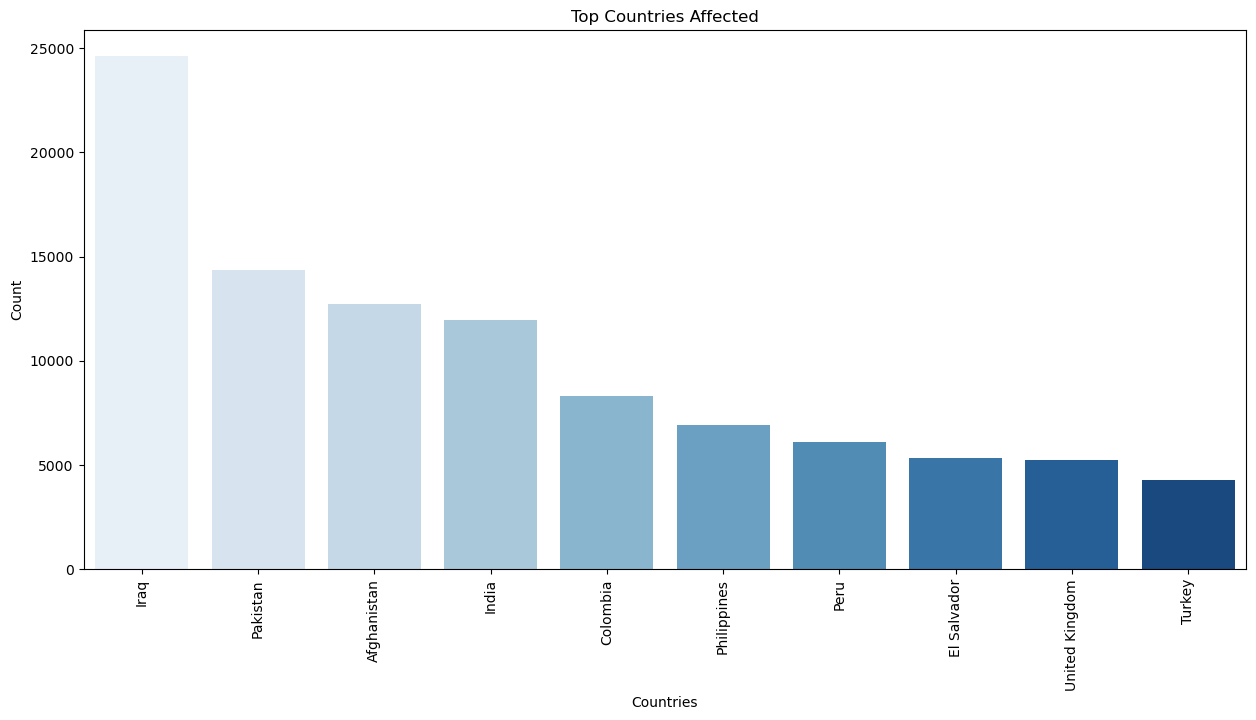

In [33]:
# Attacks aggreagated as per country
# top 10 countries with highest number of attacks

plt.subplots(figsize=(15,7))
top_countries = df['Country'].value_counts()[:10].to_frame().reset_index()
top_countries.columns = ['Country', 'Attacks_Count']
sns.barplot(x='Country', y='Attacks_Count', data=top_countries, palette='Blues')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

From the above graph we can clearly see the most affected country with terrorism are:

1.India
2.Iraq
3.Columbia
4.Afghanistan
5.Pakistan
These are the top 5 countries

**REGION-WISE ATTACKS**

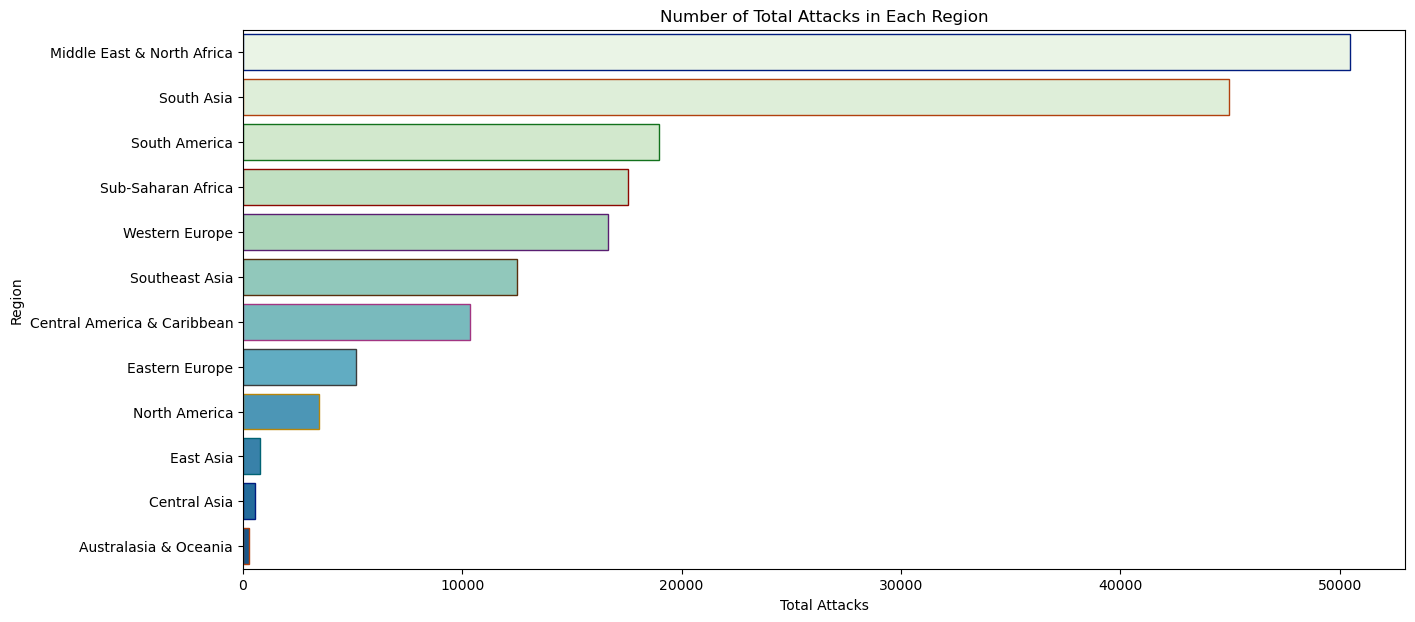

In [30]:
# Region wise attacks

region_attacks =df.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,7))
sns.barplot(x=region_attacks['Total Attacks'], y=region_attacks.Region, palette='GnBu', edgecolor=sns.color_palette('dark',10),orient='h')
plt.title('Number of Total Attacks in Each Region')
plt.show()

The most affected region is Middle east and north africa with second poistion south asia

**Attack type specific to Region_Wise**

In [37]:
# Attacks basaed on the region
region_attack_counts = df2.groupby(['Region', 'AttackType']).size().reset_index()
region_attack_counts.columns = ['Region', 'AttackType', 'Attack Count']

region = df2.Region.unique()

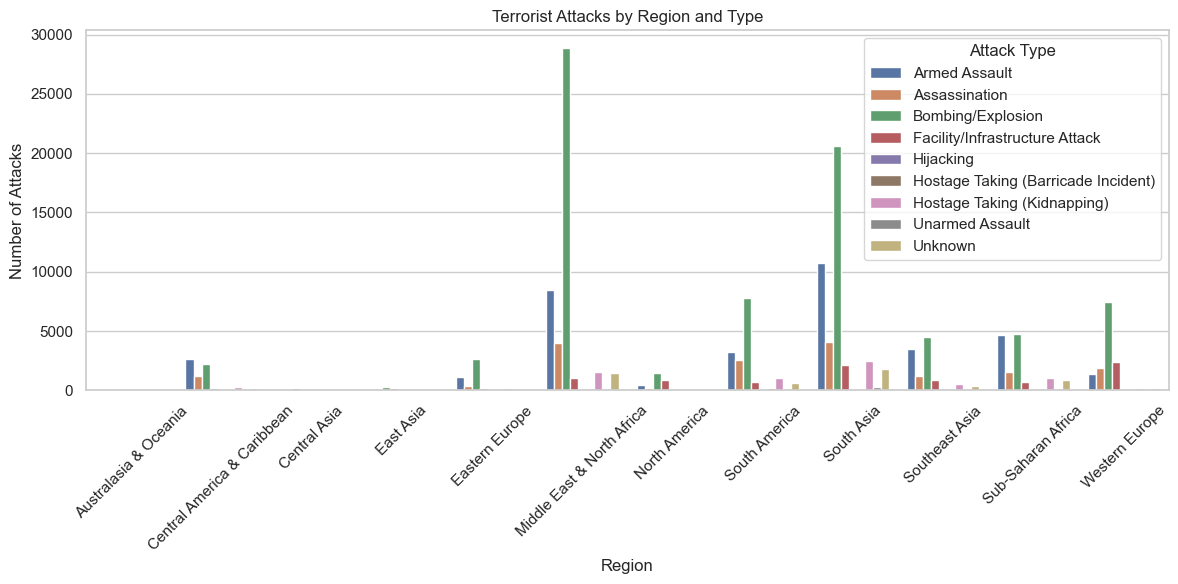

In [38]:
# Attack types based in the region
sns.set(style="whitegrid")

# Create the stacked bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=region_attack_counts, x='Region', y='Attack Count', hue='AttackType')
plt.title('Terrorist Attacks by Region and Type')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

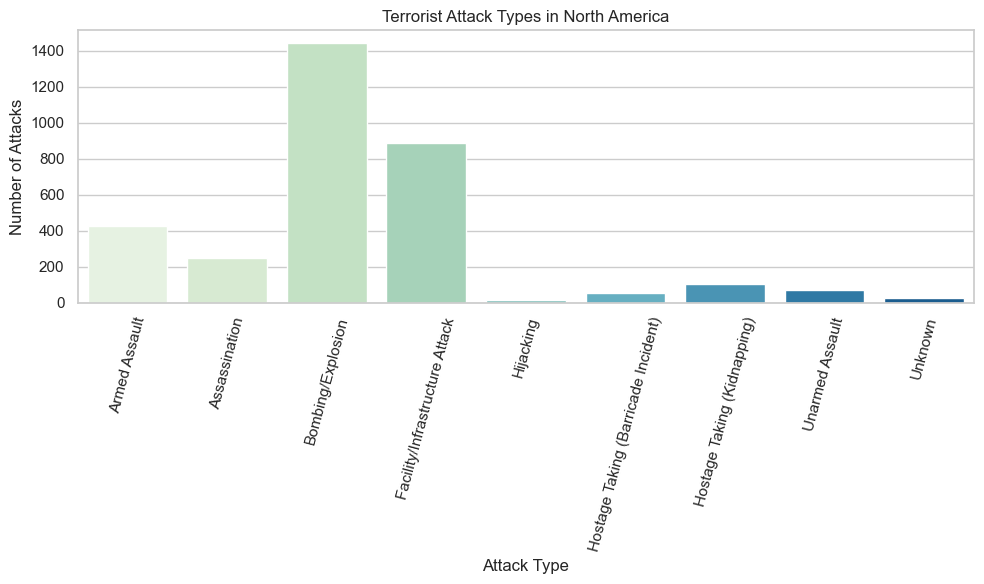

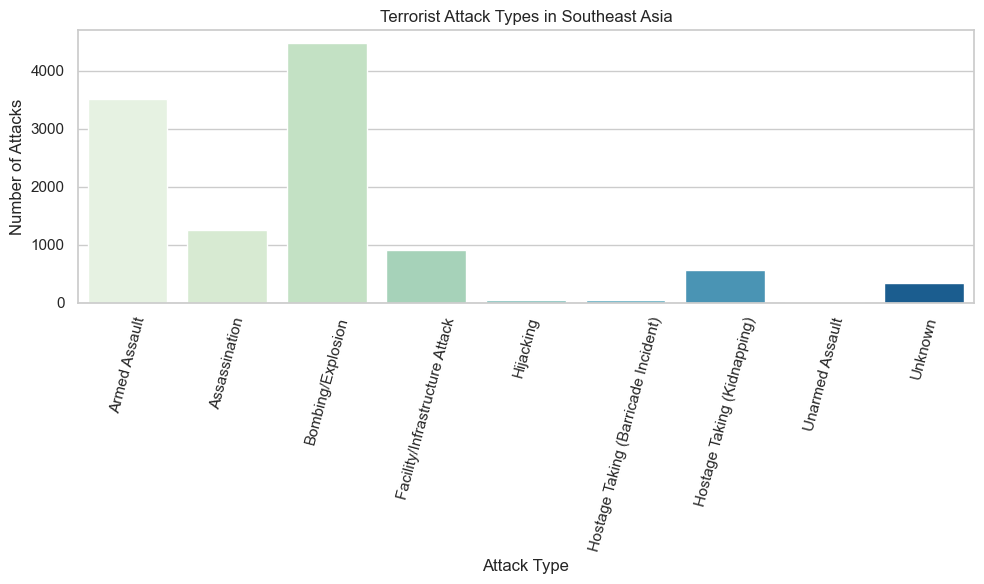

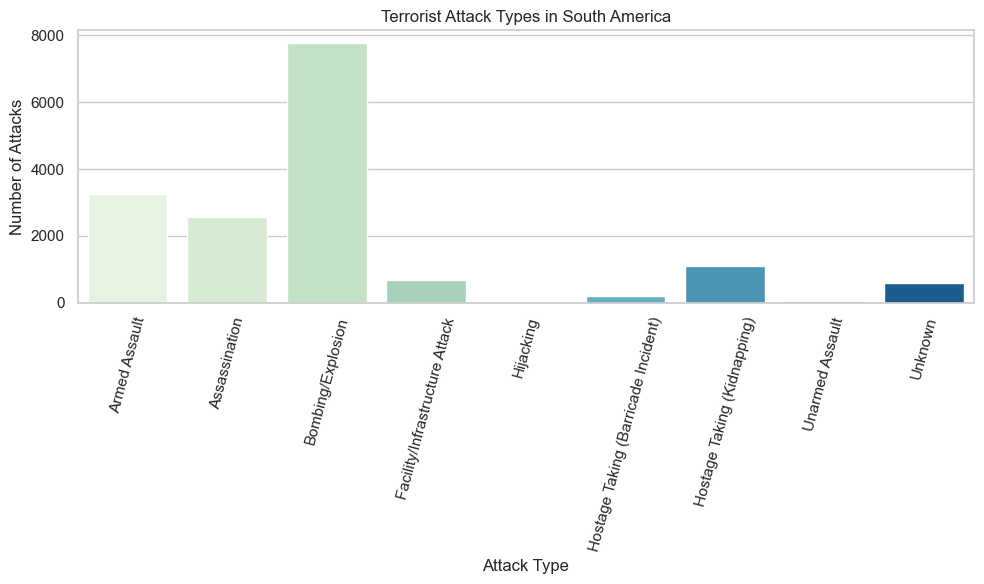

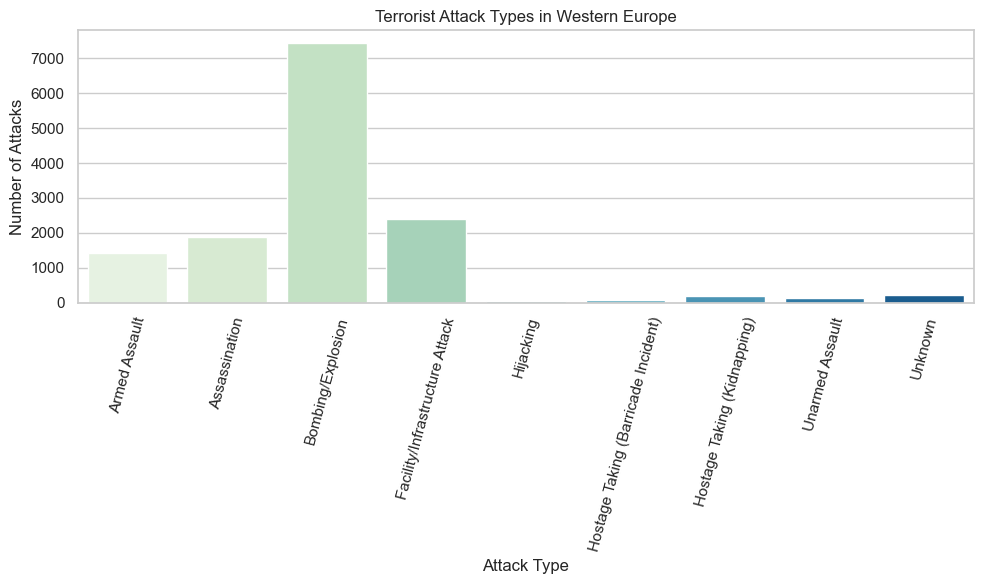

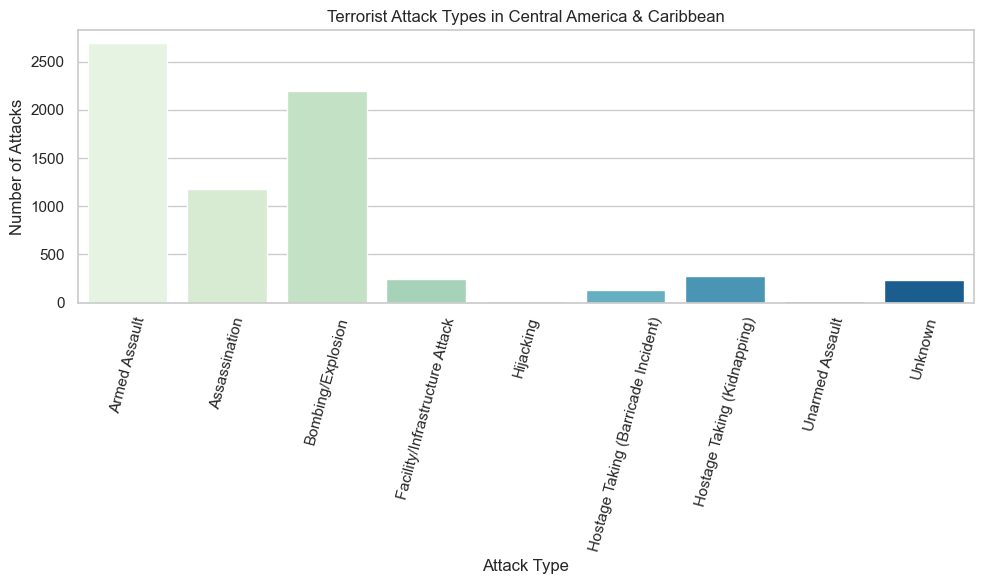

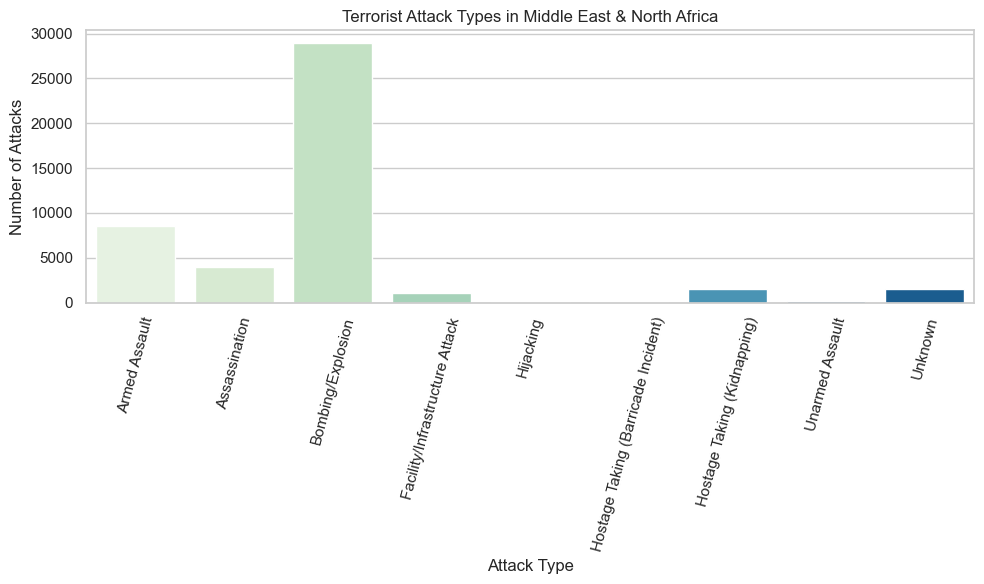

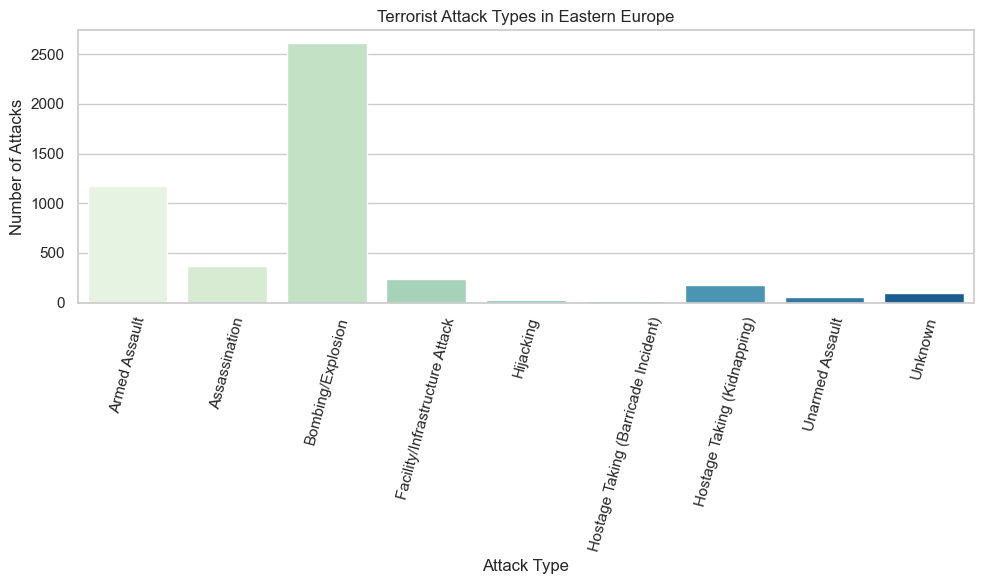

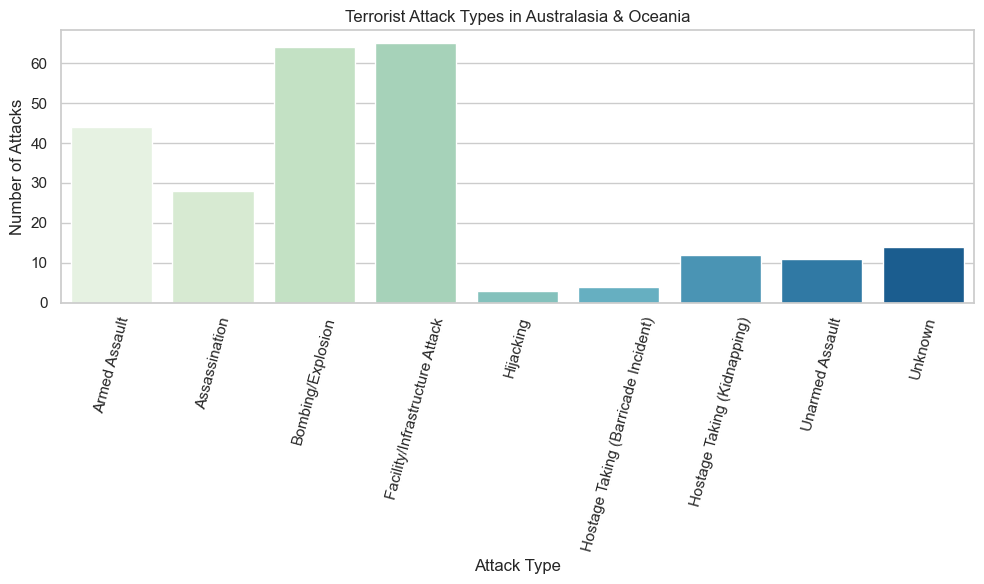

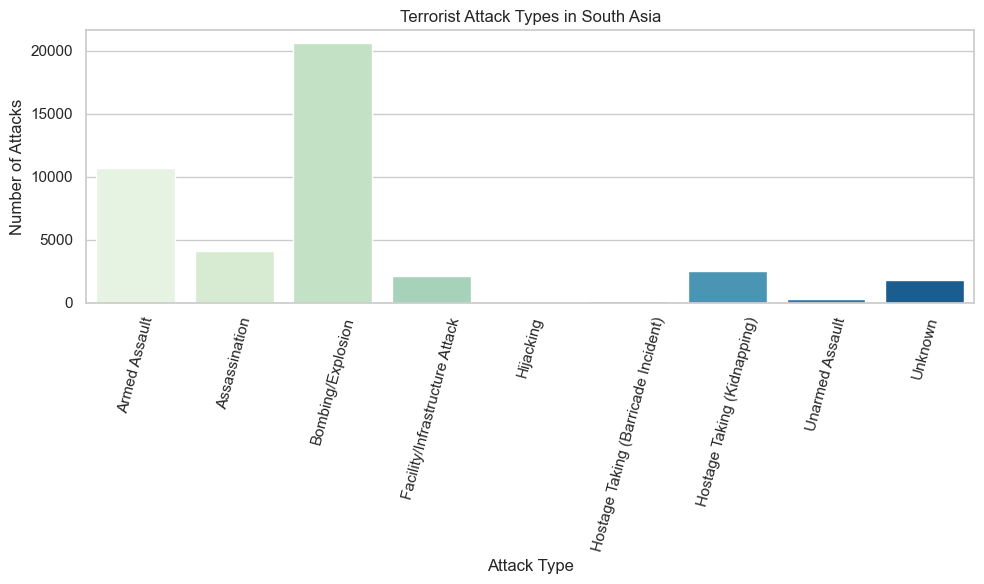

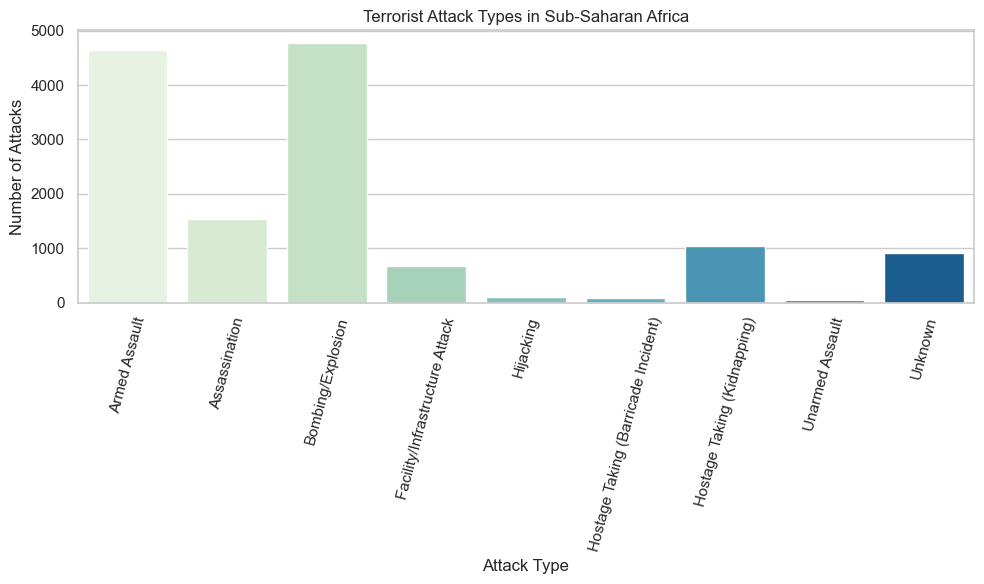

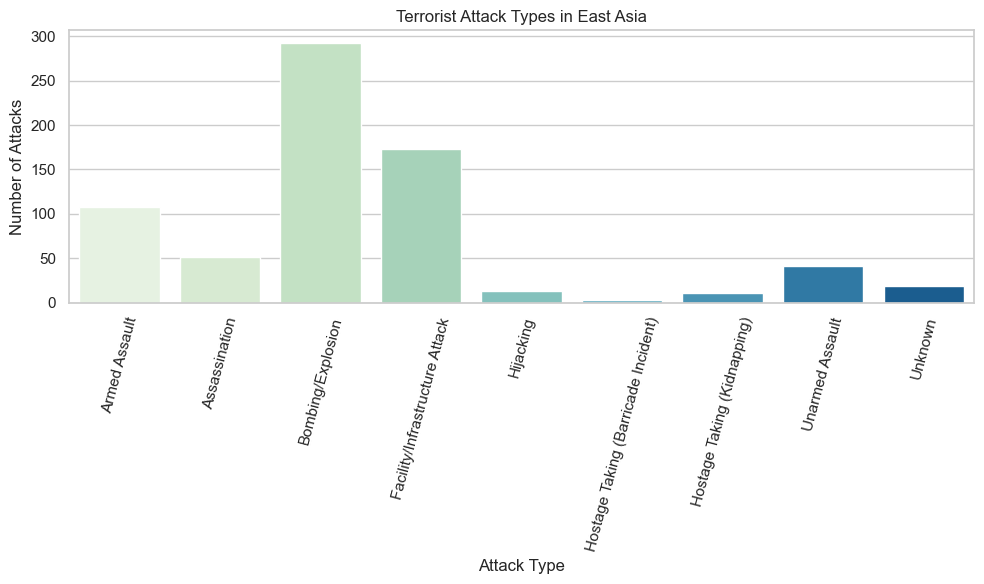

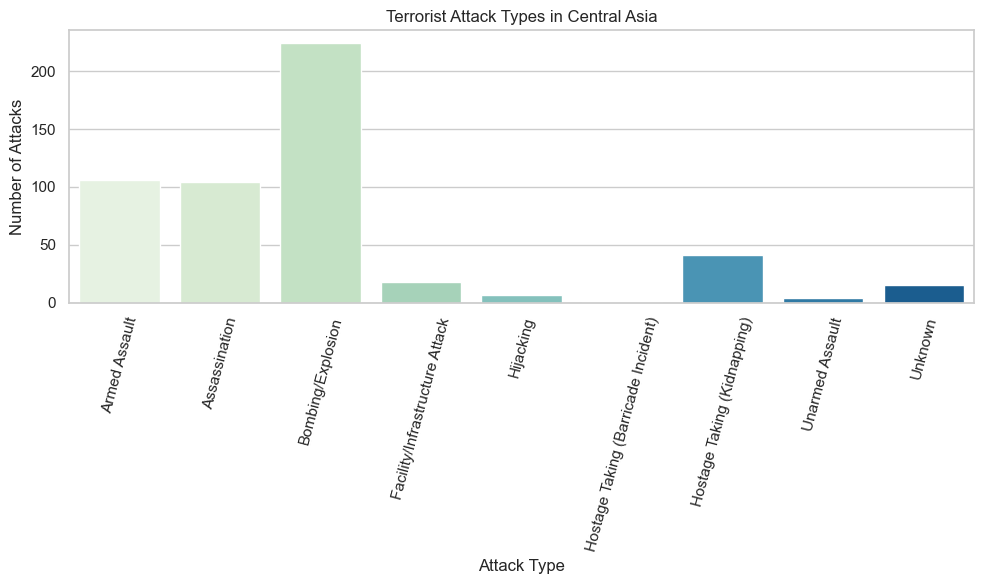

In [41]:
# Attack type specific to region_wise

def region_attack_type(region):
    sns.set(style="whitegrid")
    
    for i in region:
        selected_region = i

        # Filter the data for the selected region
        selected_region_data = region_attack_counts[region_attack_counts['Region'] == selected_region]

        # Create the bar plot
        plt.figure(figsize=(10, 6))
        sns.barplot(data=selected_region_data, x='AttackType', y='Attack Count', palette="GnBu")
        plt.title(f'Terrorist Attack Types in {selected_region}')
        plt.xlabel('Attack Type')
        plt.ylabel('Number of Attacks')
        plt.xticks(rotation=75)
        plt.tight_layout()

        plt.show()

region_attack_type(region)

Explosion is the most common type of terrorist attack but in the region of 'Australia and Oceania' : 'Facility and infrastructure attacks are more frequent'.

 **Top Weapons used by terrorists**

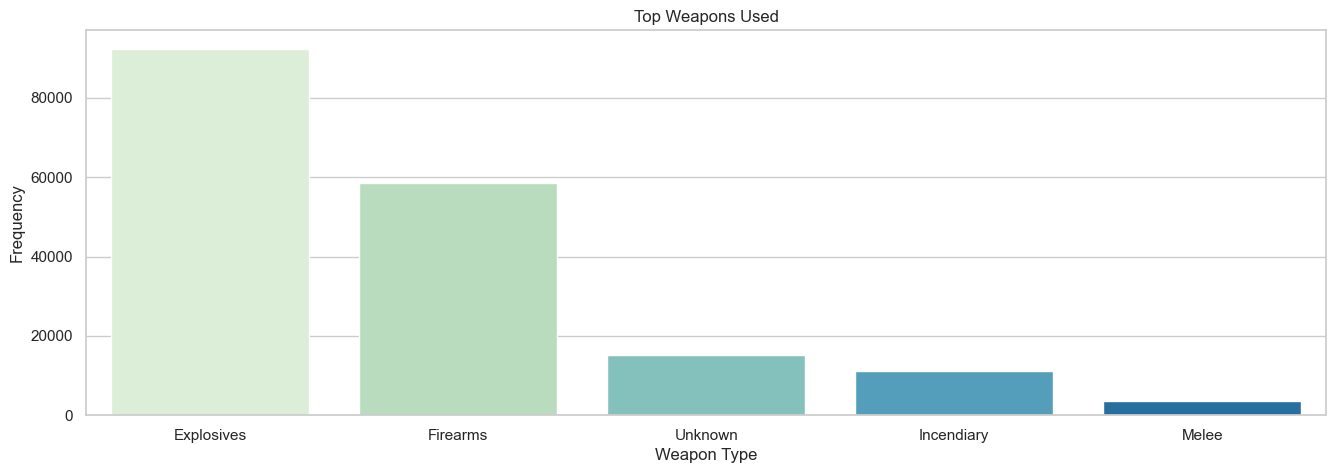

In [43]:
# lets see the top  weapons used by terrorists
plt.subplots(figsize=(16,5))


top_Weapons = df['Weapon_type'].value_counts()[:5].to_frame().reset_index()
top_Weapons.columns = ['Weapon_type', 'Count']
sns.barplot(x='Weapon_type', y='Count', data=top_Weapons, palette='GnBu')

plt.title('Top Weapons Used')
plt.xlabel('Weapon Type')
plt.ylabel('Frequency')
plt.xticks()
plt.show()


*Explosives and firearms are the most favourite medium of attacks of terrorists*

**Lets see the different groups activities and their motives and method of attacking**

In [45]:
# lets see the different groups activities and their motives and method of attacking
groups = df[['AttackType','Group','Weapon_type','Target_type']]
groups

AttackType  \
0                        Assassination   
1          Hostage Taking (Kidnapping)   
2                        Assassination   
3                    Bombing/Explosion   
4       Facility/Infrastructure Attack   
...                                ...   
181686                   Armed Assault   
181687               Bombing/Explosion   
181688  Facility/Infrastructure Attack   
181689               Bombing/Explosion   
181690               Bombing/Explosion   

                                             Group Weapon_type  \
0                                           MANO-D     Unknown   
1               23rd of September Communist League     Unknown   
2                                          Unknown     Unknown   
3                                          Unknown  Explosives   
4                                          Unknown  Incendiary   
...                                            ...         ...   
181686                                  Al-Shabaab    Firearms   
181687                           Muslim extremists  Explosives   
181688  Bangsamoro Islamic Freedom Movement (BIFM)  Incendiary   
181689                                     Unknown  Explosives   
181690                                     Unknown  Explosives   

                        Target_type  
0       Private Citizens & Property  
1           Government (Diplomatic)  
2               Journalists & Media  
3           Government (Diplomatic)  
4           Government (Diplomatic)  
...                             ...  
181686                     Military  
181687                     Military  
181688  Private Citizens & Property  
181689         Government (General)  
181690                      Unknown  

[181691 rows x 4 columns]

In [47]:
group_counts = groups['Group'].value_counts()

sorted_groups = group_counts.sort_values(ascending=False)

# Step 3: Select the top 10 most frequent groups
sorted_groups = sorted_groups.iloc[1:]
top_10_groups = sorted_groups.head(10)

top_10_groups

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group, dtype: int64

**Plotting the top 10 terrorists groups**

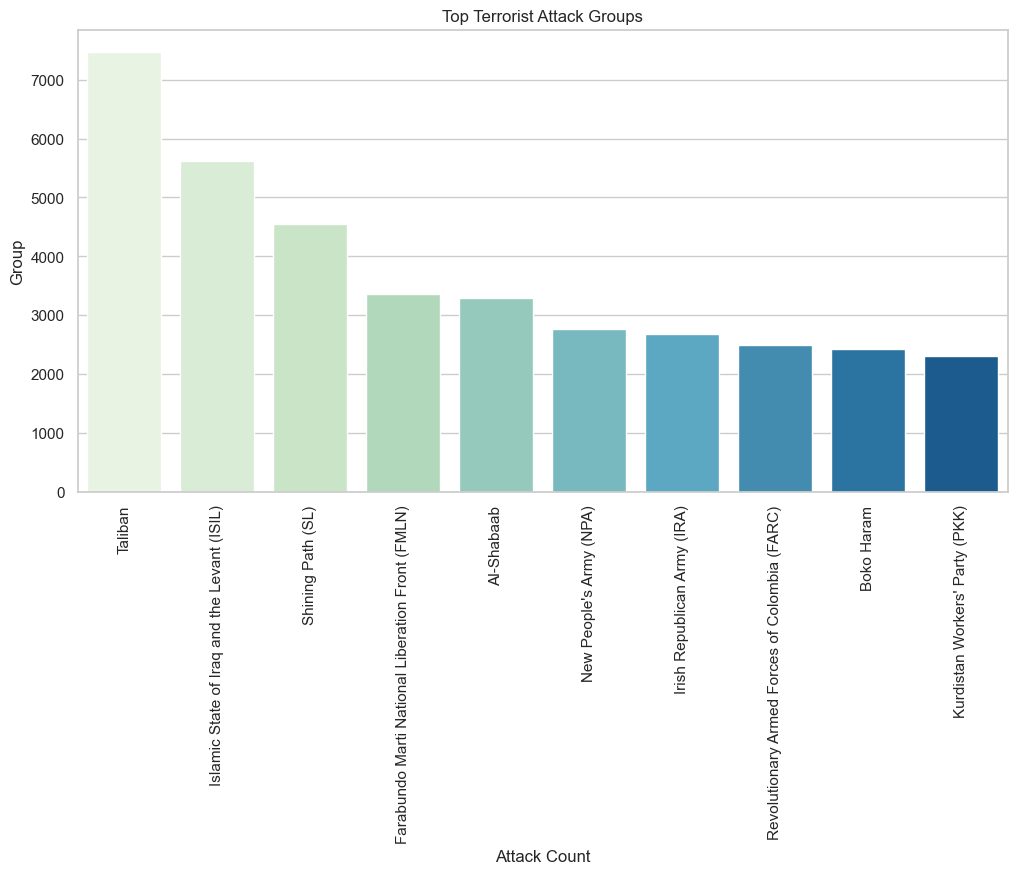

In [49]:
#Plotting the top 10 terrorists groups

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_groups.index, y=top_10_groups.values, palette="GnBu")
plt.title('Top Terrorist Attack Groups')
plt.xlabel('Attack Count')
plt.ylabel('Group')
plt.xticks(rotation = 90)
plt.show()

**Taliban and ISIL are the most active terrorist groups around the world**

**Methods of Attack used by each group**

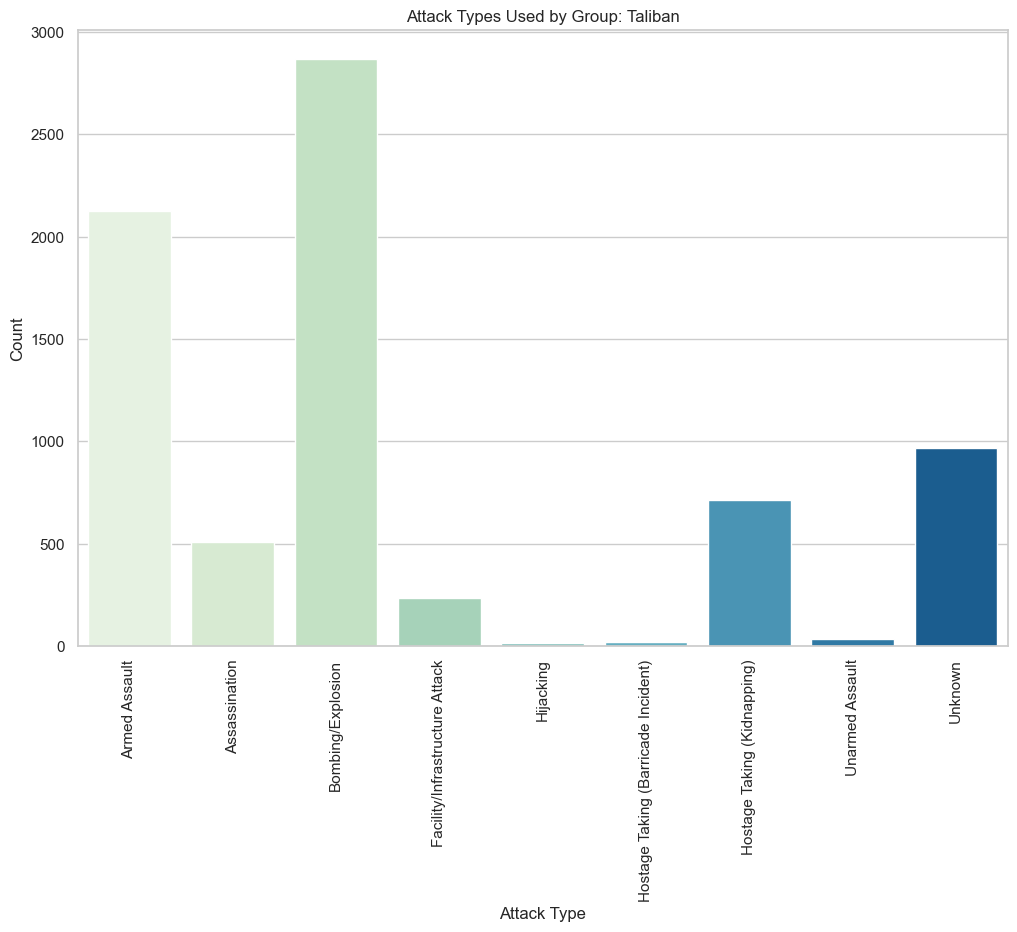

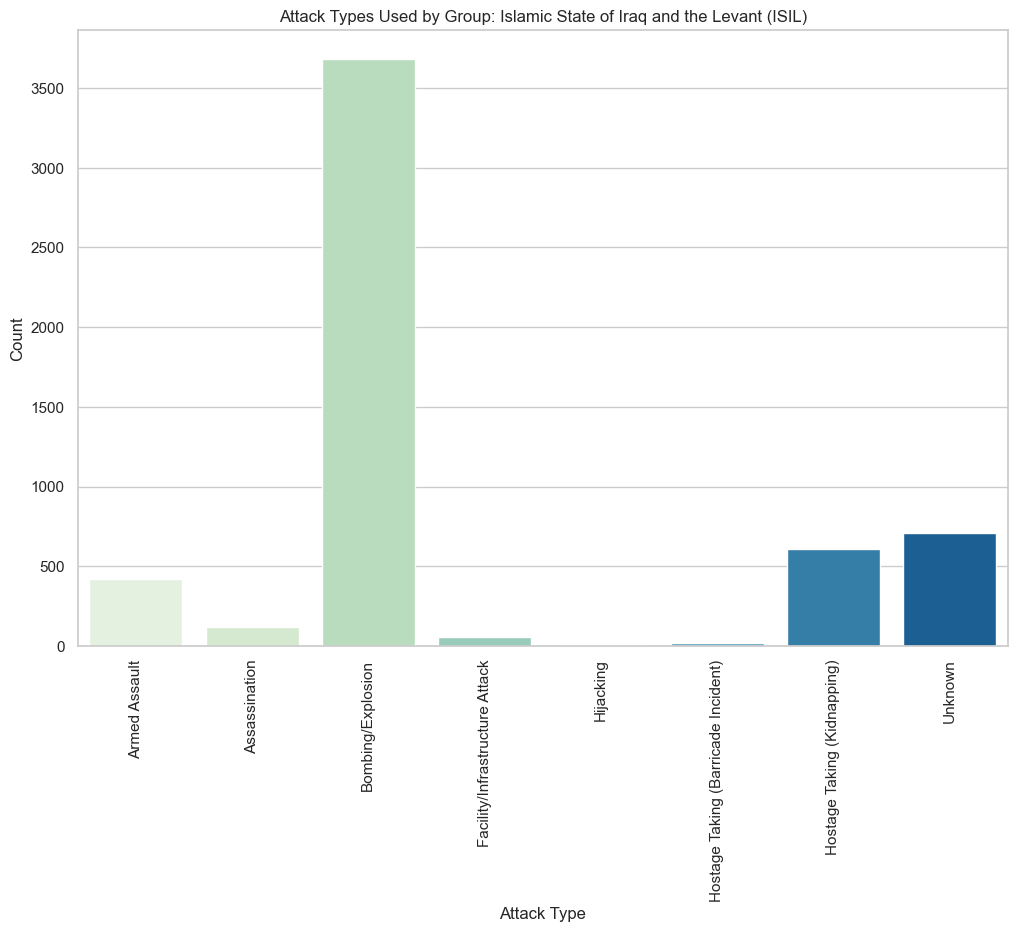

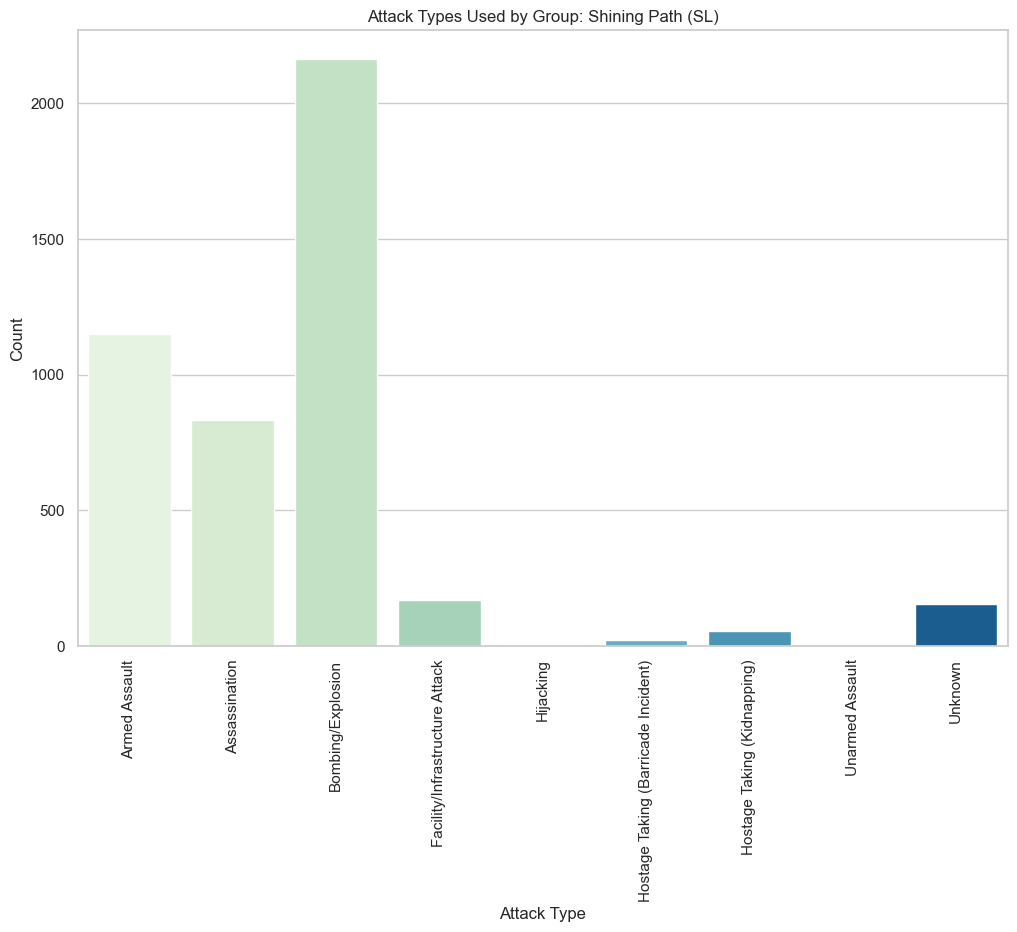

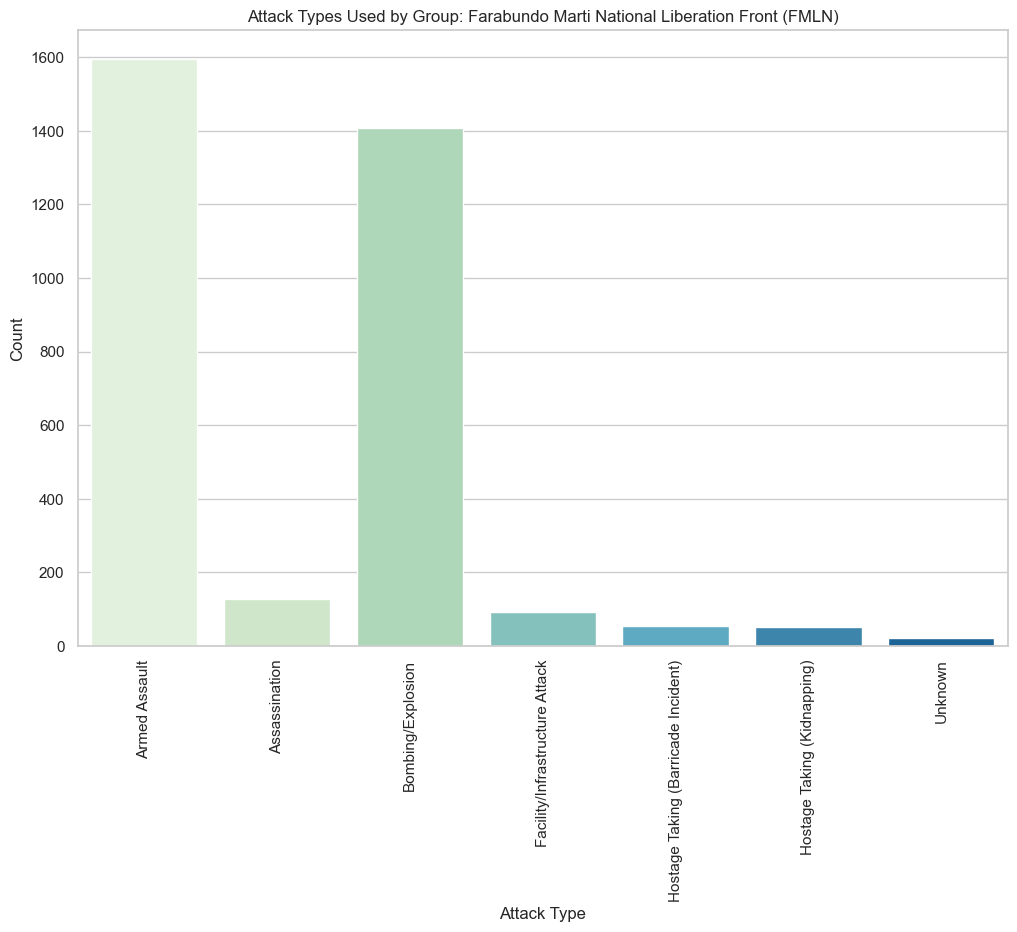

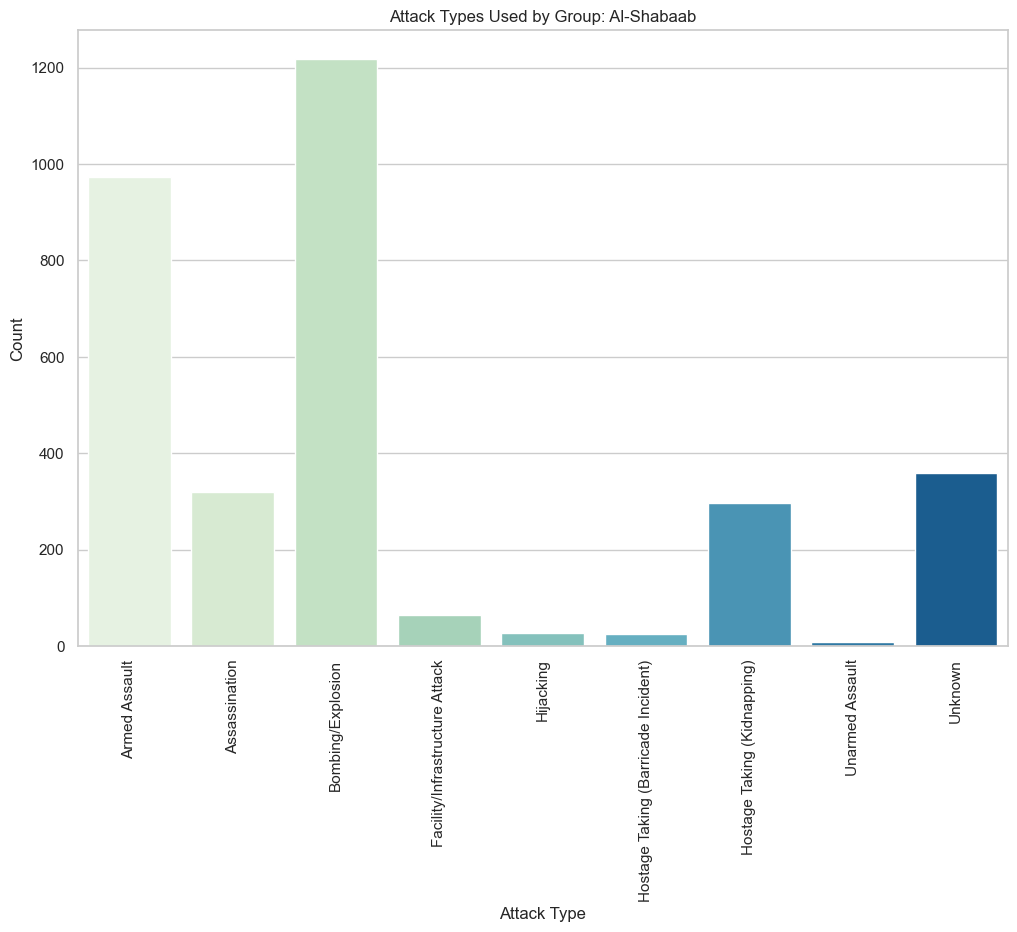

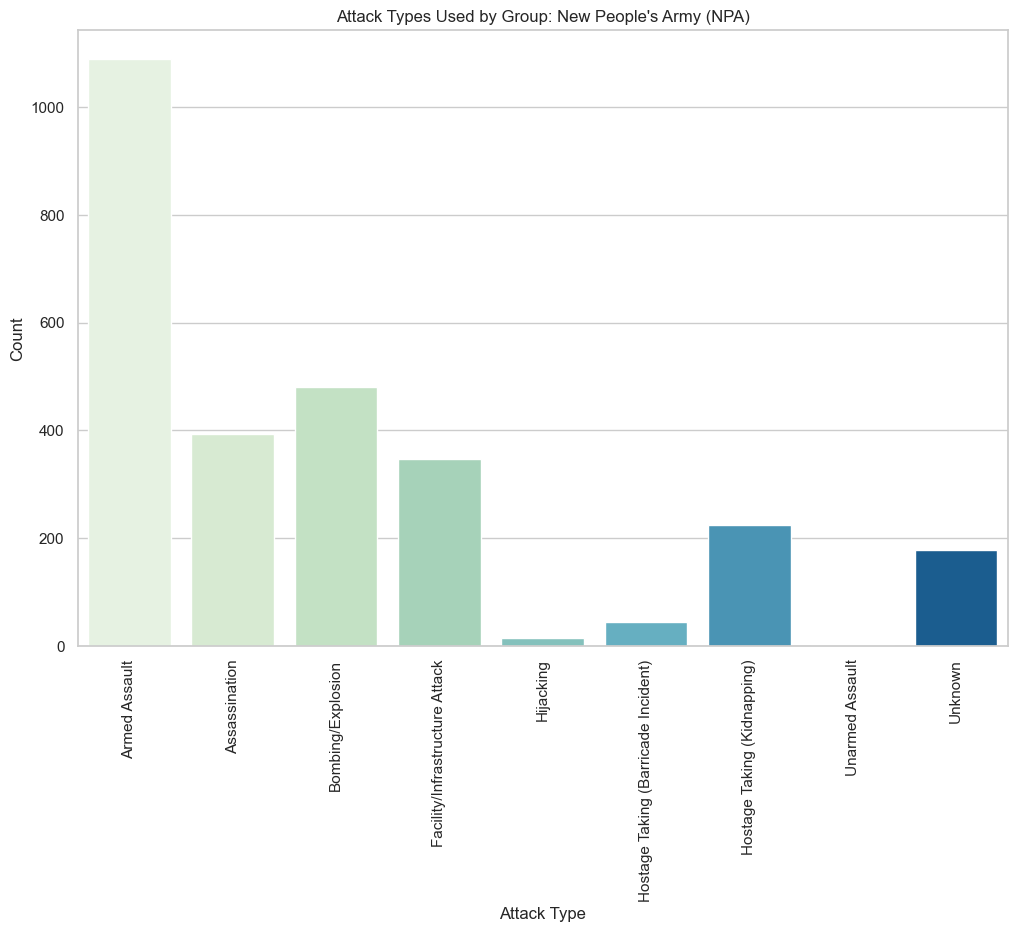

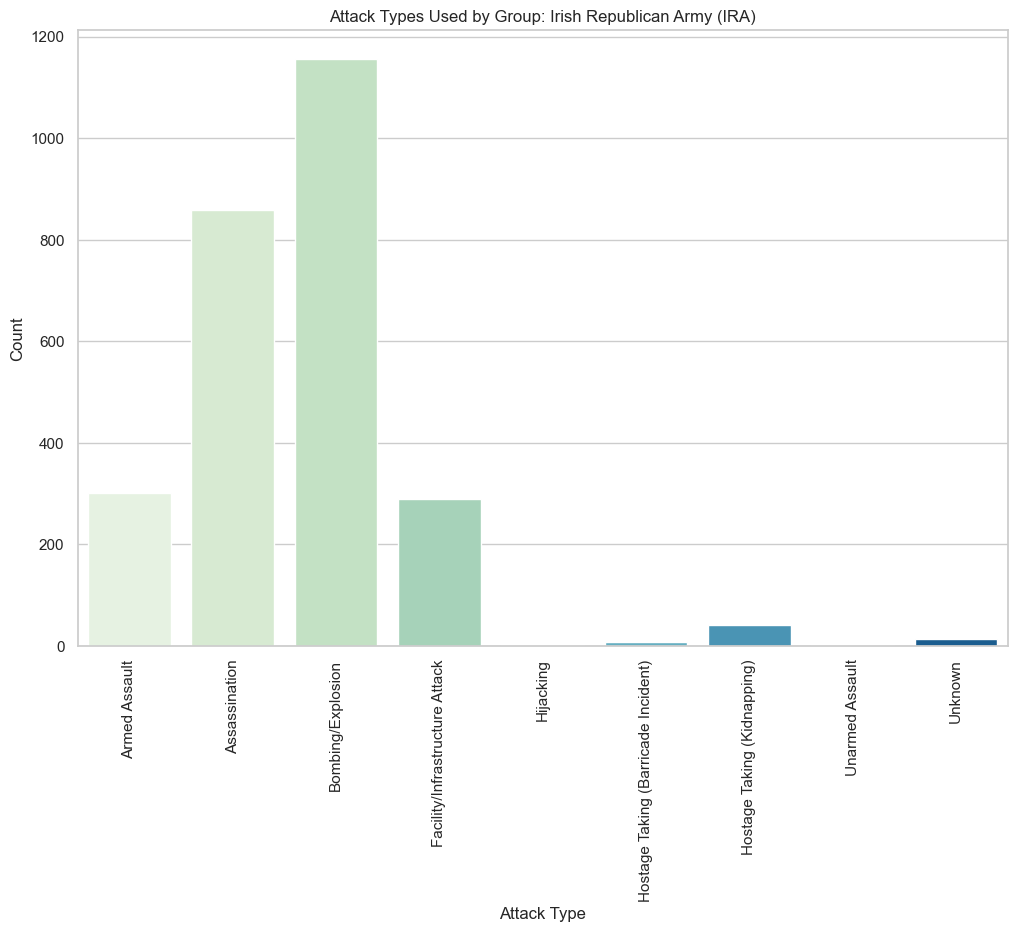

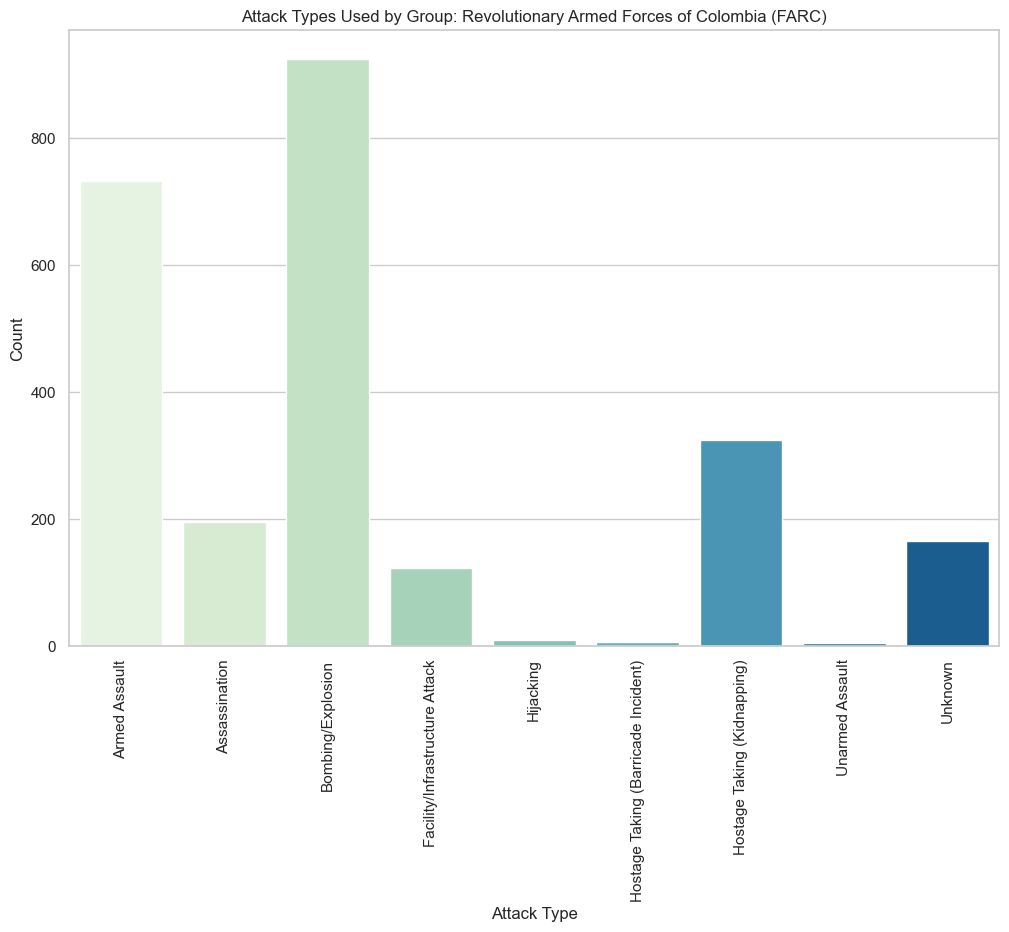

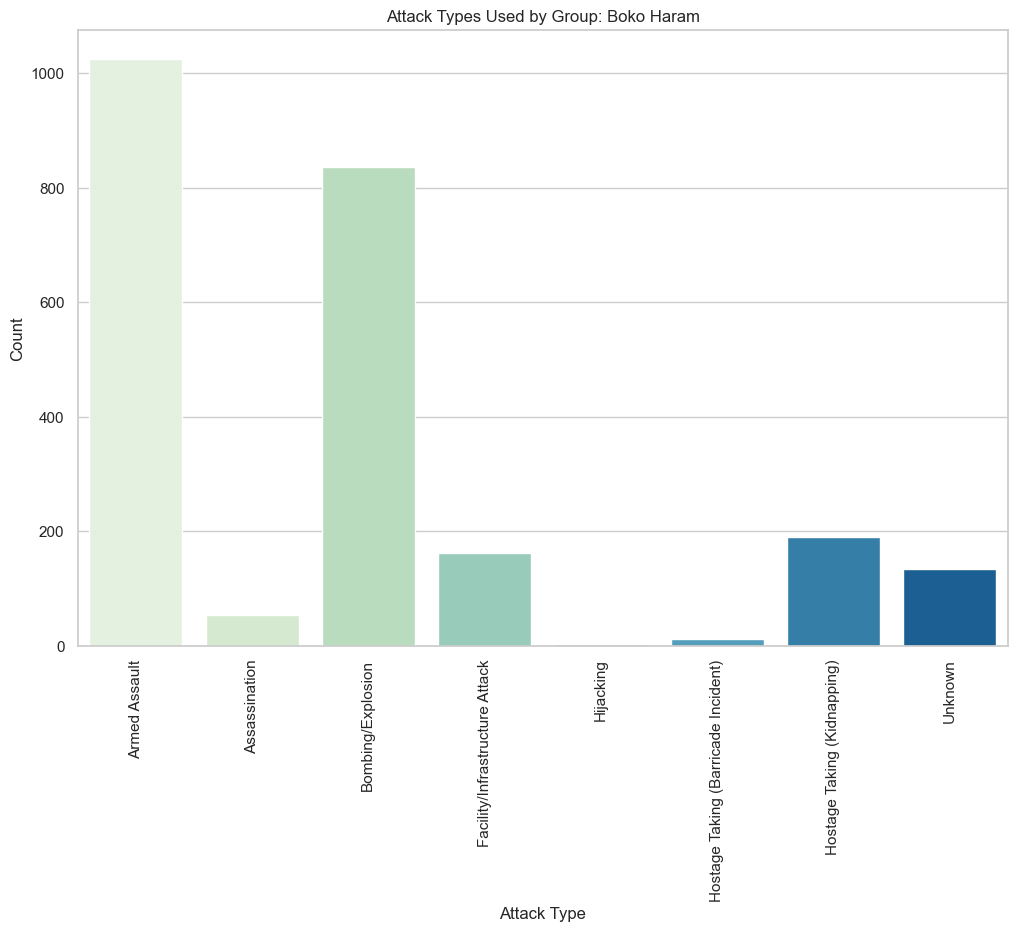

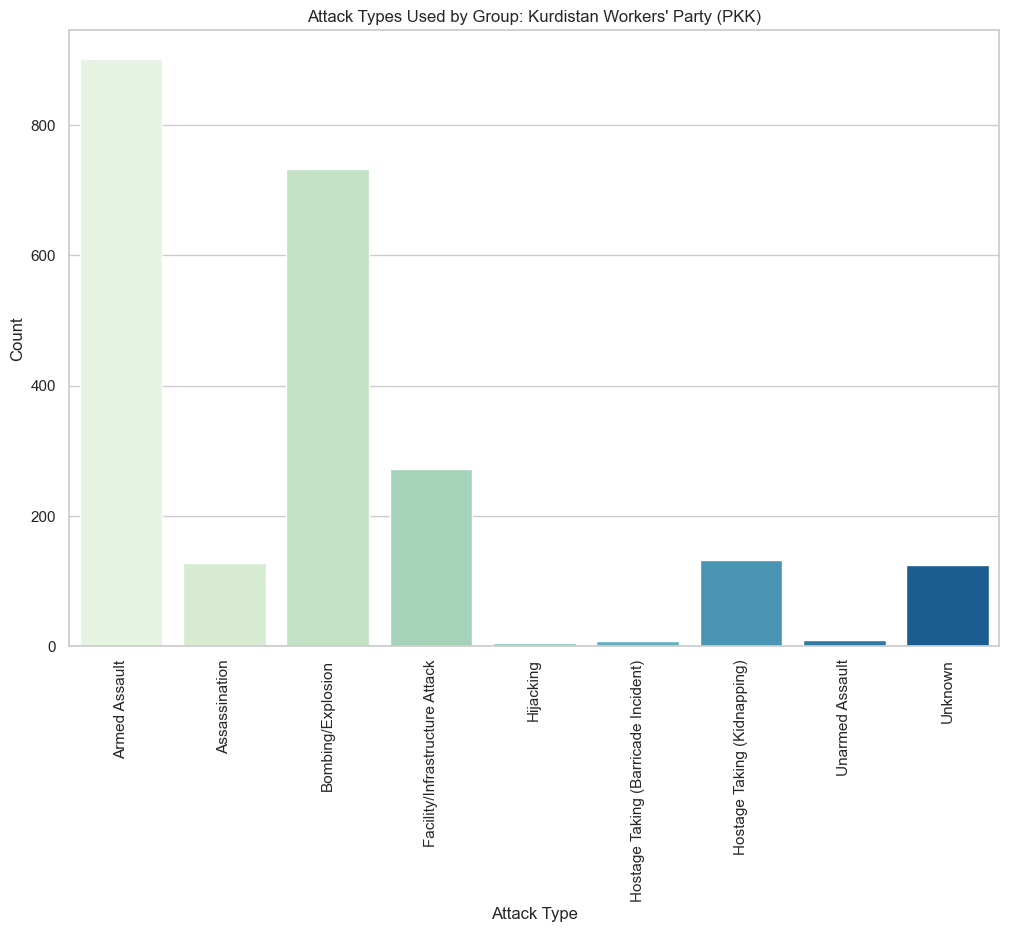

In [51]:
# Methods of Attck used by each group
grouped_data = groups.groupby(['Group', 'AttackType']).size().reset_index(name='Count')
# Get a list of unique groups
groups_name= sorted_groups.index[:10]

# Plotting for each group
for group_name in groups_name:
    plt.figure(figsize=(12, 8))
    
    # Filter data for the specific group
    group_data = grouped_data[grouped_data['Group'] == group_name]
    
    sns.barplot(x=group_data['AttackType'], y = group_data['Count'],palette='GnBu')
    plt.xlabel('Attack Type')
    plt.ylabel('Count')
    plt.title(f'Attack Types Used by Group: {group_name}')
    plt.xticks(rotation=90)
    plt.show()


According to chart,
Armed Assault and Explosives/bombing is the most common types of attack methods used by terrorist groups.
Some around the groups like shining path and IRA , they choose Assasination as a type of attack frequently.

**Targets all over the world -Frequently**

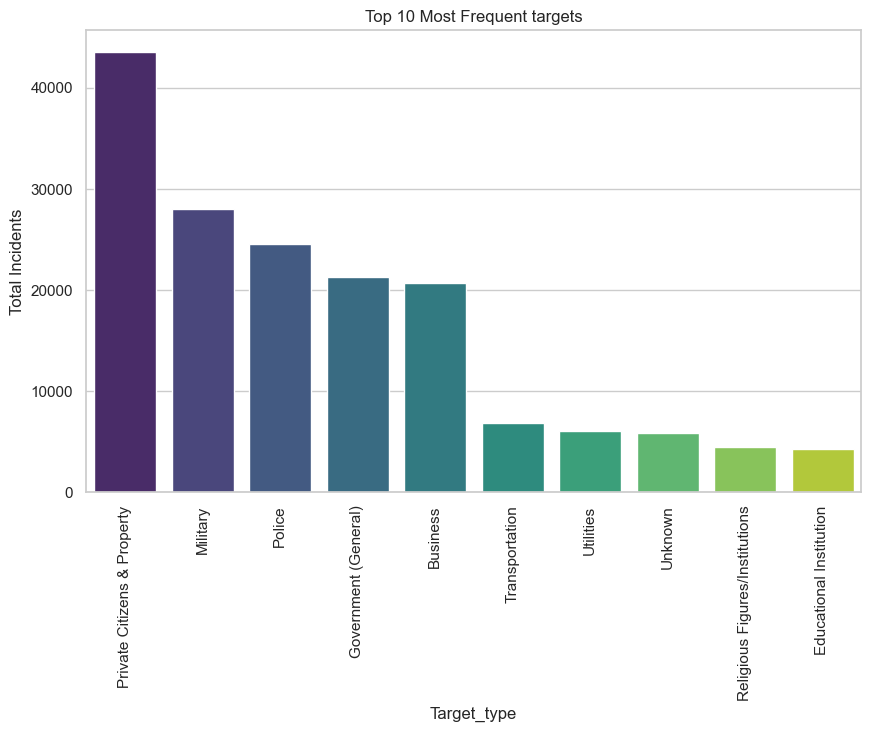

In [57]:
# Most frequent targets all over the world
target_counts = groups['Target_type'].value_counts()
sorted_Target= target_counts.sort_values(ascending=False)

# Select the top 10 most frequent groups
top_10_groups = sorted_Target.head(10)

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_groups.index, y=top_10_groups.values,palette='viridis')
plt.xlabel('Target_type')
plt.ylabel('Total Incidents')
plt.title('Top 10 Most Frequent targets')
plt.xticks(rotation=90)
plt.show()

*As per chart, Private cittizen and property are the most common target type choosed by terrorists groups.*

**Let's check the trend by top 10 terrorist groups their favourite target types**

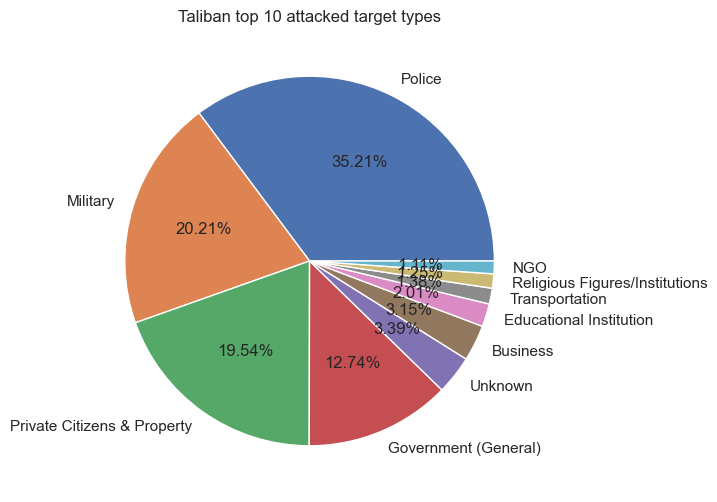

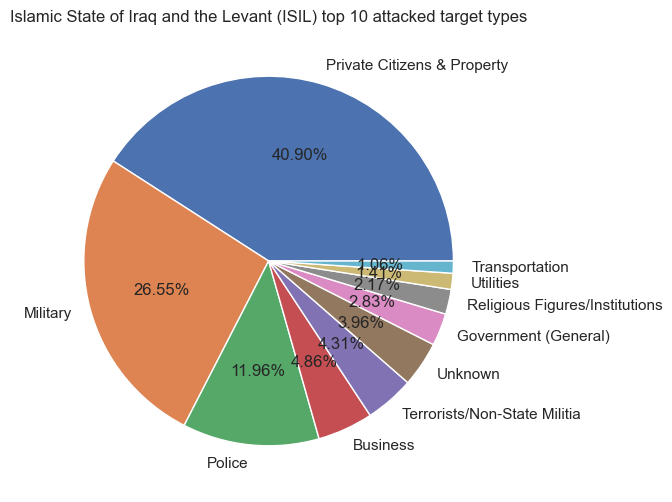

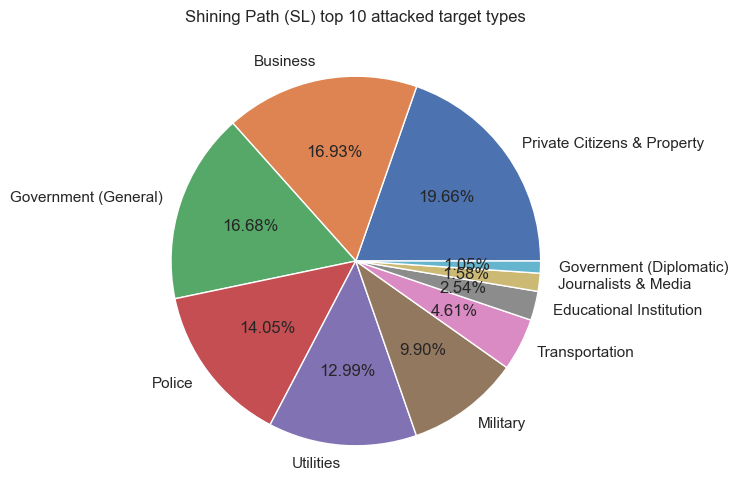

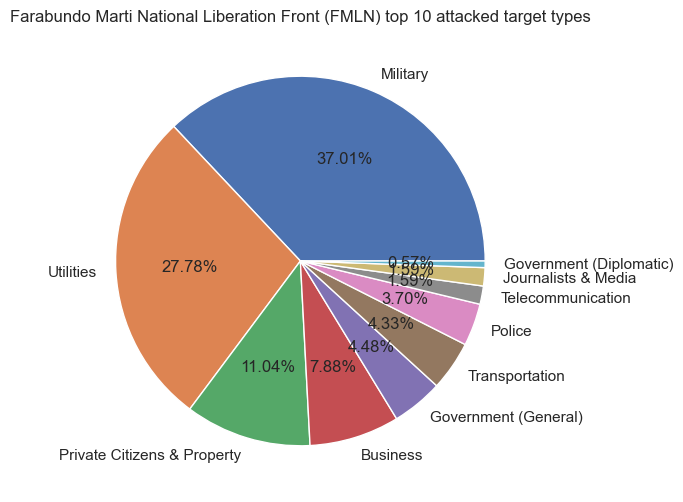

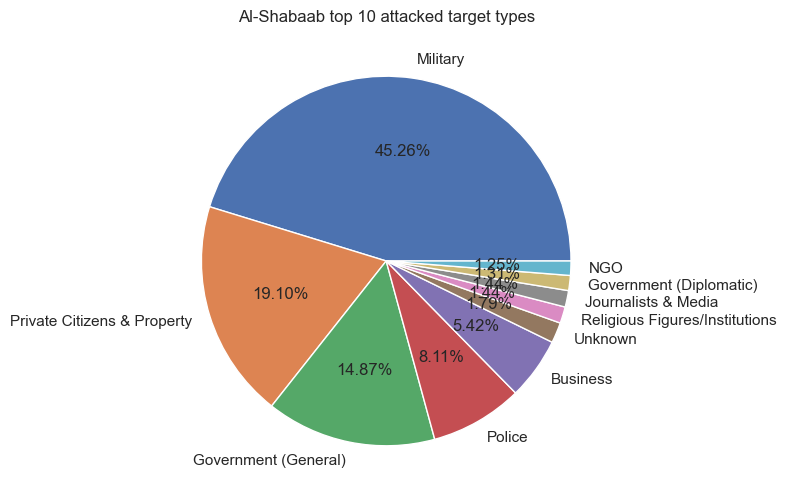

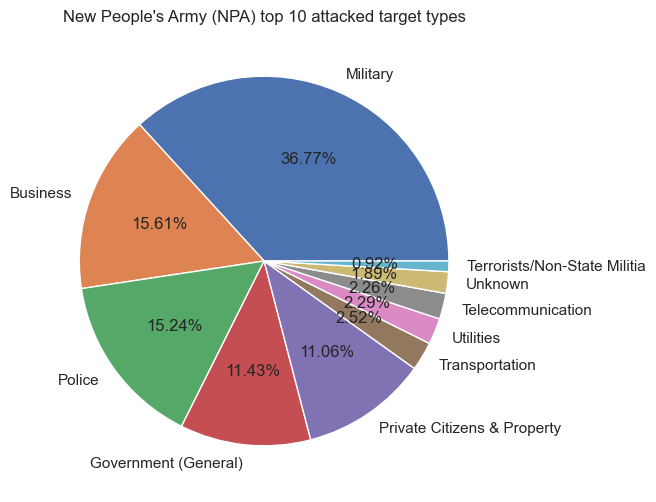

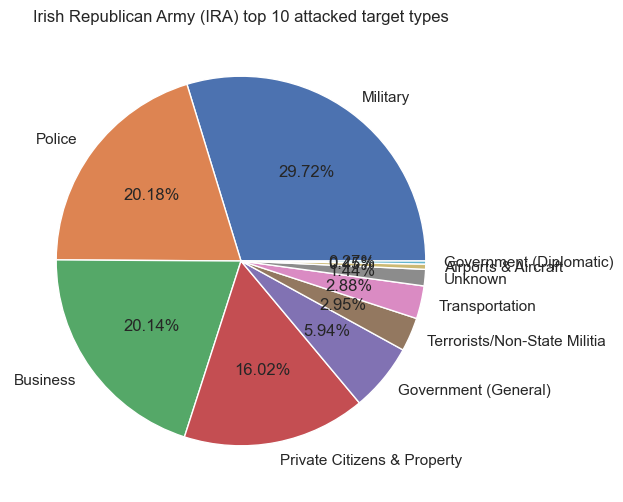

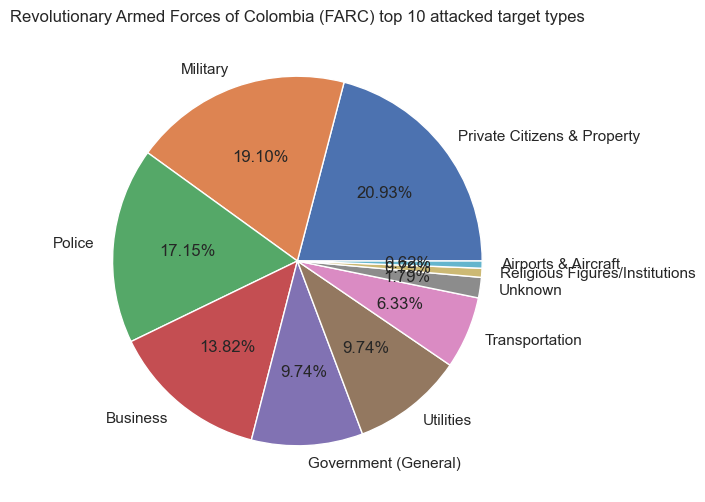

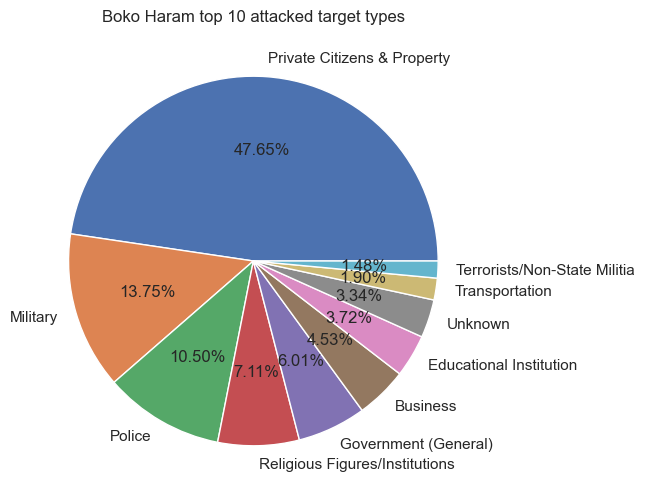

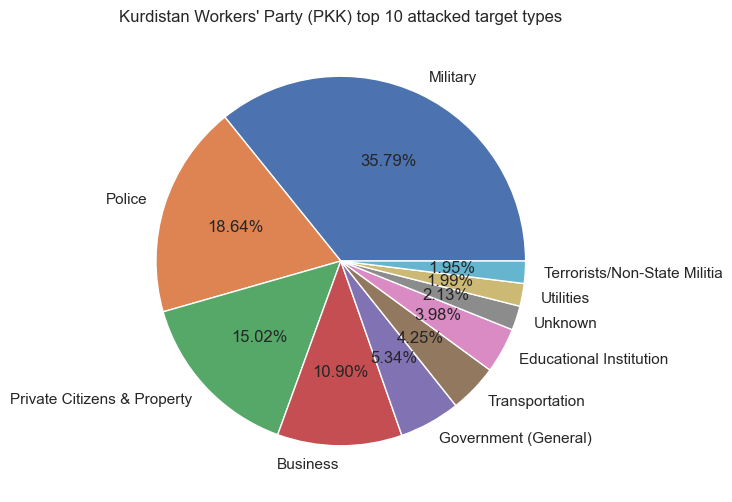

In [58]:
# lets check the trend by top 10 terrorist groups their favourite target types
def top_target():
    grouping = groups.groupby(['Group'])
    for group_name in groups_name:
        grouping.get_group(group_name)
        sort_taliban = grouping.get_group(group_name)['Target_type'].value_counts().sort_values(ascending = False)

        #plot a graph
        plt.figure(figsize=(12,6))
        plt.pie(sort_taliban[:10].values,labels=sort_taliban[:10].index,autopct = '%.2f%%')
        plt.title(f"{group_name} top 10 attacked target types")
        plt.show()
top_target()

**Lets see top 10 group attacks and casualties over time**

In [64]:
# lets see the different groups activities and their motives and method of attacking
groups['Casualties'] = df['Killed']+df['Wounded']
groups['Year'] = df['Year']
groups['Casualties'].fillna(-1,inplace = True)

In [65]:
# Unknown values given -1 as not known
groups['Casualties']

0         1.0
1         0.0
2         1.0
3        -1.0
4        -1.0
         ... 
181686    3.0
181687    9.0
181688    0.0
181689    0.0
181690    0.0
Name: Casualties, Length: 181691, dtype: float64

**Each year casualties recorded due to attacks by each group**

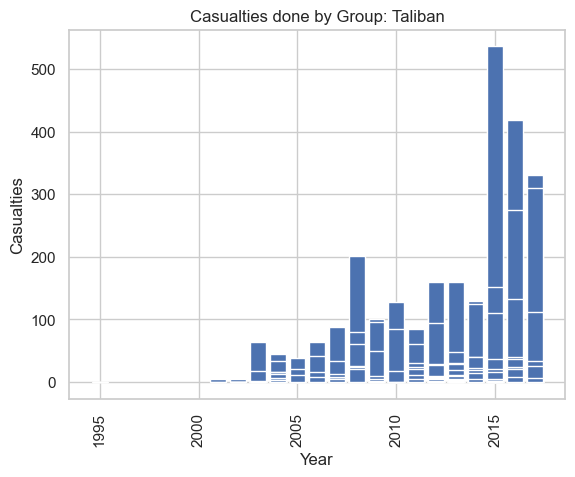

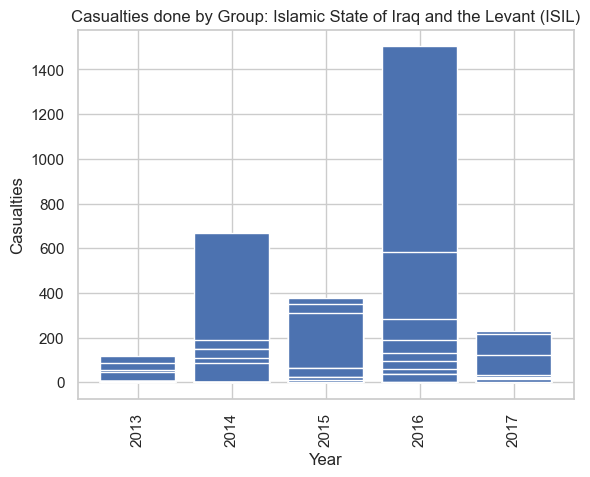

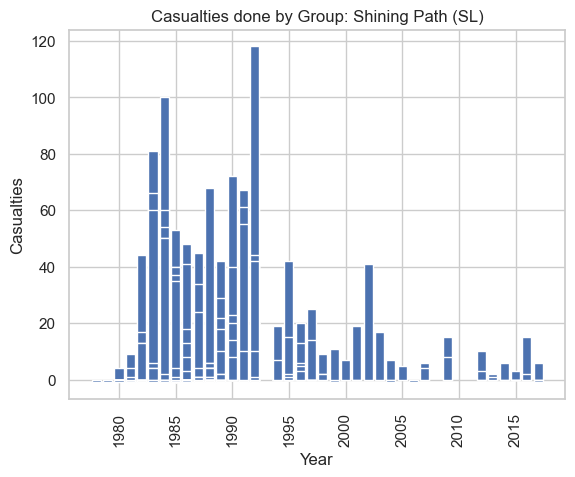

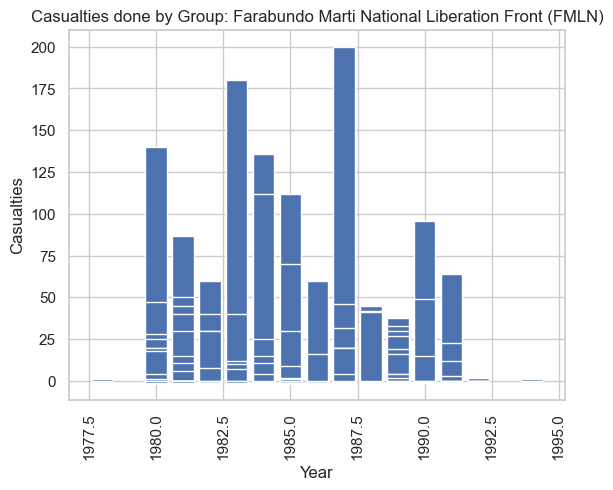

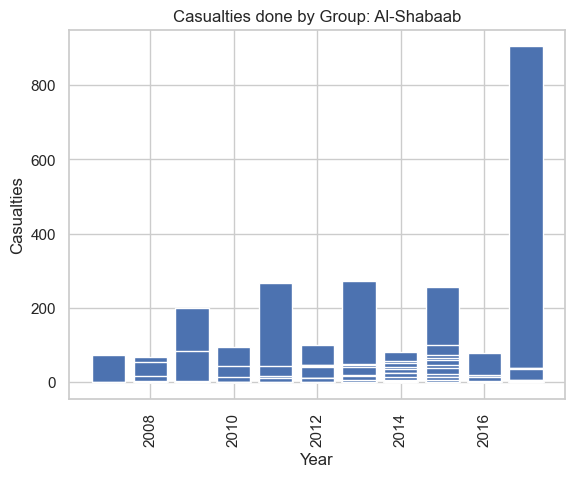

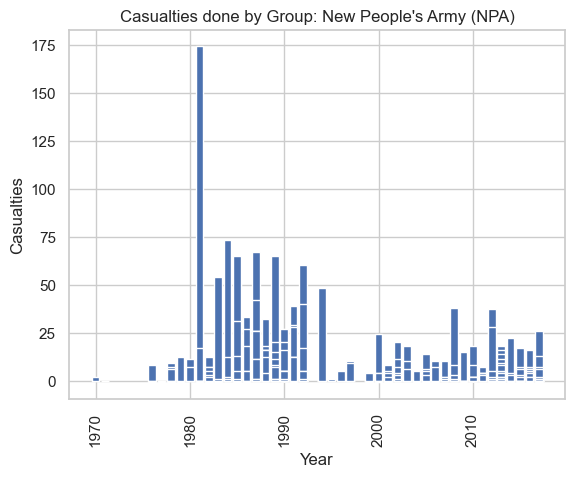

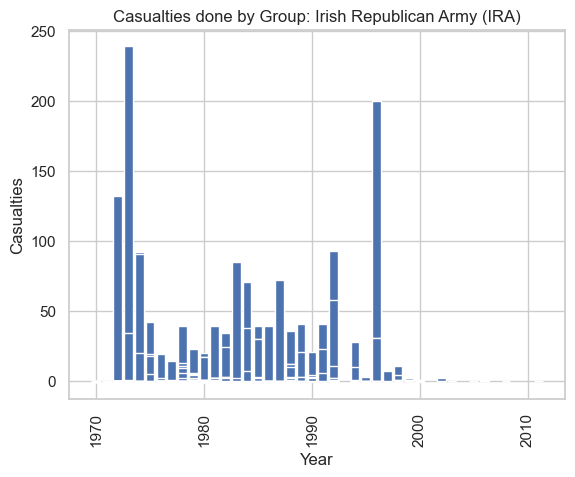

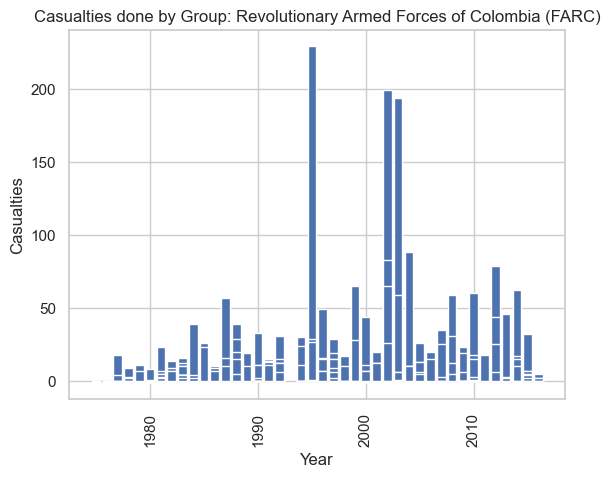

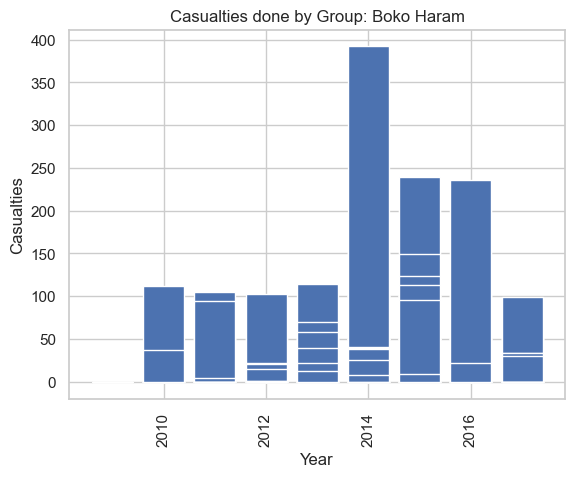

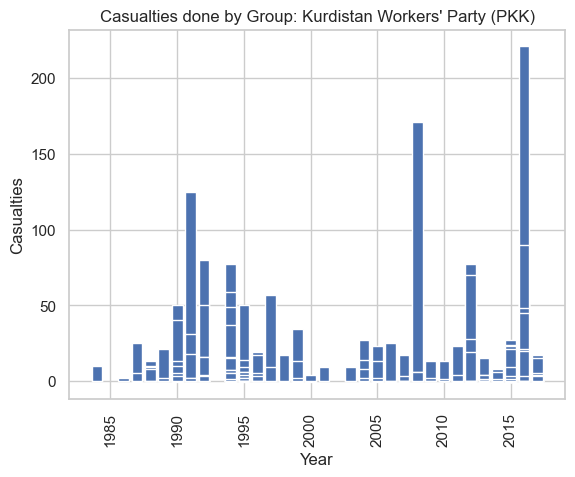

In [66]:
# each year casualties recorded due to attacks by each group
def casulty_year_group():
    grouping = groups.groupby(['Group'])
#     groups_name = data['Group'].unique()
    for group_name in groups_name:

        group_data = grouping.get_group(group_name)
    
        plt.bar(group_data['Year'], group_data['Casualties'])
        plt.xlabel('Year')
        plt.ylabel('Casualties')
        plt.title(f'Casualties done by Group: {group_name}')
        plt.xticks(rotation=90)
        plt.show()
casulty_year_group()

**Key Findings**

As Year passing by these 4 terrorist groups becoming stronger and resulting to major events around the globe

**1.ISIL ( Islamic State of Iraq and the levant )**
ISIL was the deadliest group in 2016 with a more than 100 percent increase in deaths from its previous peak in 2015.
This group is active in Iraq however after attacks in 2016 it has lower its activites and on further finding s we find out, ISIL is now near complete military defeat in Iraq and Syria.
Thus, we can see less events from this group for a year two as it was near complete defeat.
ISIL main method of attack is Explosion and Bombing.
Their most attacked target are 'Private citizen and Property , Military' 

**2.Taliban**
As plotted above the activities of Taliban over years ,their terrorist attack trend keep growing and if it this keeps on they will lead to some major events in coming years as we can see in present day, Taliban overthrowned the Afghanistan goverment and now it is in power in the country.
Taliban consistently used bombings and armed assaults as its main modes of attack.
Seems their favourite target is 'Police and Military'

**3.Al-Shabaab**
A Salafist militant group active in East Africa.
This group recorded a more than 4 times casuslties in 2017 compared to what it wasa in 2016.
This exponential growth suggest only that this group is strengthening i region of somalia and kenya.
Al-Shabaab has consistently utilised bombings and armed assaults as its main modes of attack.
Seems their favourite target is 'Military'

**4.Boko Haram**
Boko Haram is a jihadist extremist group based in northeastern Nigeria.
This group engaging in terrorism activities from 2010 therfore it can be called as emerging terrorist group which did a major attack in 2014 as seen graph resulting in more than 300 casualties. There major source of attack is Armed Assault, and seems to target 'Private citizen and Property' more often

Iraq experienced a 40 per cent increase in deaths in 2016 in reflecting the increased intensity of ISIL activity following attacks by the Iraqi Armed Forces.

Middle East & North Africa , South East Asia are the two regions that seen a major surge of terrorism activities from 2005 till 2015 , while Central and South America were least affected.

Globally, attacks against private properties increased by nearly 16 percent from 2015 to 2016. The primary targets of terrorists are private citizens and property.

**3. Correlation**

*Here we can see correlation between Country and Attack count*

In [ ]:
import plotly.express as px

# Group the data by country and count the number of attacks
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Attack Count']

# Create the choropleth map
fig = px.choropleth(country_counts,locations='Country',locationmode='country names', color='Attack Count',
                    title='Terrorist Attacks by Country',
                    labels={'Attack Count': 'Number of Attacks'},
                    hover_name='Country',color_continuous_scale='Greens')

fig.show()

**Putting above map into numbers and seeing correlation of attacks to casulaties**

In [79]:
corr_data = df2.groupby('Country').agg({'Country': 'count', 'Killed': 'sum', 'Wounded': 'sum'})
corr_data.columns = ['Total Attacks', 'Total Killed', 'Total Wounded']
corr_data.reset_index(inplace=True)

corr_data['Casualties'] = corr_data['Total Killed']+corr_data['Total Wounded']
corr_data.drop(['Total Killed', 'Total Wounded'],axis = 1,inplace = True)

In [80]:
corr_data

Country  Total Attacks  Casualties
0    Afghanistan          11716     79446.0
1        Albania             64       152.0
2        Algeria           2433     17885.0
3         Angola            424      4040.0
4      Argentina            713      1134.0
..           ...            ...         ...
197        Yemen           2860     16249.0
198   Yugoslavia            185       378.0
199        Zaire             42       336.0
200       Zambia             54        84.0
201     Zimbabwe             89       373.0

[202 rows x 3 columns]

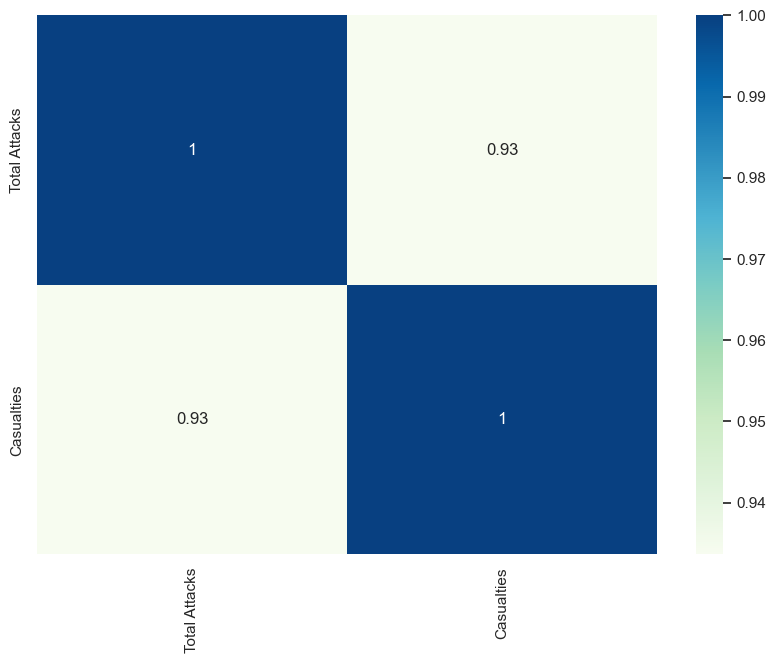

In [83]:
plt.figure(figsize = (10,7))
sns.heatmap(corr_data.corr(),cmap = 'GnBu',annot = True)
plt.xticks(rotation = 90)
plt.show()

This correlation tells us if their is any terrorist attack their are 93 percent of getting casualties.
High,correlation can be seen between them.

**4. Implementing Regression**

In [87]:
# Use regression model and with help of regression model try to predict the casulaties depending on the method of attack used

# using simple regression

reg_data = df[['AttackType','Killed','Wounded']]
reg_data['casualities']=df['Killed']+df['Wounded']
reg_data.drop(['Wounded','Killed'],axis = 1)

AttackType  casualities
0                        Assassination          1.0
1          Hostage Taking (Kidnapping)          0.0
2                        Assassination          1.0
3                    Bombing/Explosion          NaN
4       Facility/Infrastructure Attack          NaN
...                                ...          ...
181686                   Armed Assault          3.0
181687               Bombing/Explosion          9.0
181688  Facility/Infrastructure Attack          0.0
181689               Bombing/Explosion          0.0
181690               Bombing/Explosion          0.0

[181691 rows x 2 columns]

In [107]:
# above our data is given
# import libraries to be used
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

trf = ColumnTransformer([
    ('OHE',OneHotEncoder(drop = 'first'),[0])],remainder = 'passthrough')

new_reg_file = trf.fit_transform(reg_data)

#Giving Atrributes and target
X = new_reg_file[:,:-1]
y = new_reg_file[:,-1]

#performing train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)

#Training the model
lr=LinearRegression()
trf.fit(X_train,y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(drop='first'), [0])])

**The regression model is working perfectly with very high accuracy**

**5. Time series**

*Number of terrorist activities each year*

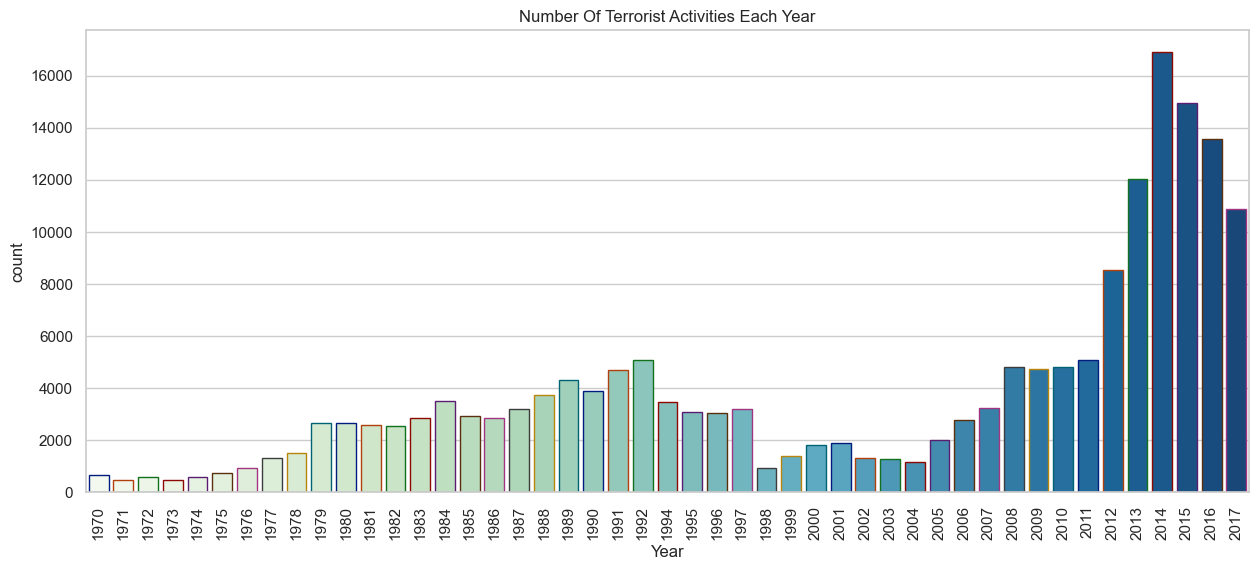

In [126]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Year',data= df,palette='GnBu',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()


**Terrorist Attacks Trends in Regions from 1970 to 2017**

In [130]:
yearly_attacks_region = df.groupby(['Year', 'Region']).size().reset_index(name='count')


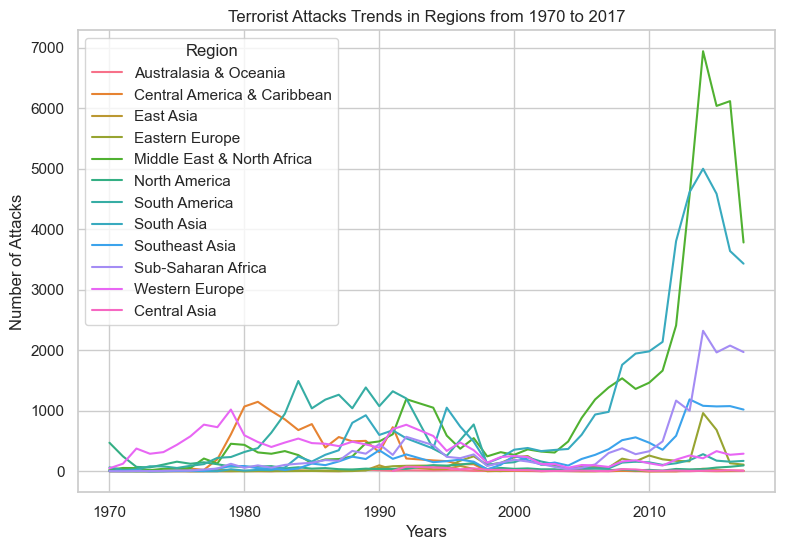

In [131]:
plt.figure(figsize = (9,6))
sns.lineplot(x='Year', y='count',hue='Region', data=yearly_attacks_region )
plt.title('Terrorist Attacks Trends in Regions from 1970 to 2017')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.show()

As per chart analyse, there has been a fluctuation in the number of terrorism attacks from 1970 to 2004. While during 2005, there was a dramatic increase in terrorism attacks around the globe./ Figures were fives time higher by the end of 2017!

In [134]:
data_filtered = df[(df['Month'] != 0) ]
data_filter = data_filtered[data_filtered['Day'] != 0]

data_filter

Year  Month  Day             Country                       Region  \
0       1970      7    2  Dominican Republic  Central America & Caribbean   
5       1970      1    1       United States                North America   
6       1970      1    2             Uruguay                South America   
7       1970      1    2       United States                North America   
8       1970      1    2       United States                North America   
...      ...    ...  ...                 ...                          ...   
181686  2017     12   31             Somalia           Sub-Saharan Africa   
181687  2017     12   31               Syria   Middle East & North Africa   
181688  2017     12   31         Philippines               Southeast Asia   
181689  2017     12   31               India                   South Asia   
181690  2017     12   31         Philippines               Southeast Asia   

                  state           city   latitude   longitude  \
0                   NaN  Santo Domingo  18.456792  -69.951164   
5              Illinois          Cairo  37.005105  -89.176269   
6            Montevideo     Montevideo -34.891151  -56.187214   
7            California        Oakland  37.791927 -122.225906   
8             Wisconsin        Madison  43.076592  -89.412488   
...                 ...            ...        ...         ...   
181686  Middle Shebelle  Ceelka Geelow   2.359673   45.385034   
181687         Lattakia         Jableh  35.407278   35.942679   
181688      Maguindanao       Kubentog   6.900742  124.437908   
181689          Manipur         Imphal  24.798346   93.940430   
181690      Maguindanao  Cotabato City   7.209594  124.241966   

                            AttackType  Killed  Wounded  \
0                        Assassination     1.0      0.0   
5                        Armed Assault     0.0      0.0   
6                        Assassination     0.0      0.0   
7                    Bombing/Explosion     0.0      0.0   
8       Facility/Infrastructure Attack     0.0      0.0   
...                                ...     ...      ...   
181686                   Armed Assault     1.0      2.0   
181687               Bombing/Explosion     2.0      7.0   
181688  Facility/Infrastructure Attack     0.0      0.0   
181689               Bombing/Explosion     0.0      0.0   
181690               Bombing/Explosion     0.0      0.0   

                                                   Target  \
0                                            Julio Guzman   
5                               Cairo Police Headquarters   
6       Juan Maria de Lucah/Chief of Directorate of in...   
7                                         Edes Substation   
8       R.O.T.C. offices at University of Wisconsin, M...   
...                                                   ...   
181686                                         Checkpoint   
181687                                   Hmeymim Air Base   
181688                                             Houses   
181689                                             Office   
181690                                            Unknown   

                                                  Summary  \
0                                            Not Recorded   
5       1/1/1970: Unknown African American assailants ...   
6                                            Not Recorded   
7       1/2/1970: Unknown perpetrators detonated explo...   
8       1/2/1970: Karl Armstrong, a member of the New ...   
...                                                   ...   
181686  12/31/2017: Assailants opened fire on a Somali...   
181687  12/31/2017: Assailants launched mortars at the...   
181688  12/31/2017: Assailants set fire to houses in K...   
181689  12/31/2017: Assailants threw a grenade at a Fo...   
181690  12/31/2017: An explosive device was discovered...   

                                             Group  \
0                                           MANO-D   
5                  

**Yearly Trends of Terrorist Attacks**

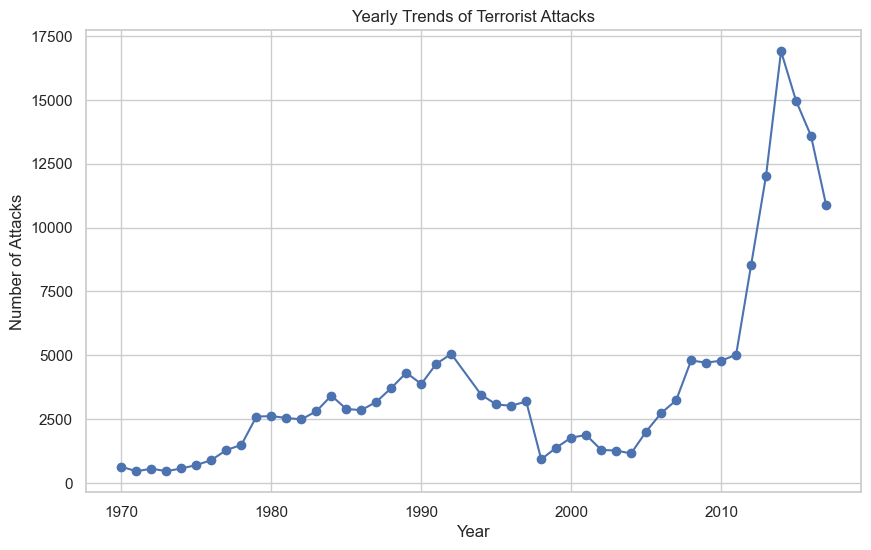

In [135]:
data_filter ['Date'] = pd.to_datetime(data_filter [['Year', 'Month', 'Day']])

# Temporal Trends - Yearly
yearly_attacks = data_filter.groupby(data_filter ['Date'].dt.year)['Country'].count()
plt.figure(figsize=(10, 6))
plt.plot(yearly_attacks.index, yearly_attacks.values, marker='o')
plt.title('Yearly Trends of Terrorist Attacks')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()

**Seasonality - Monthly**

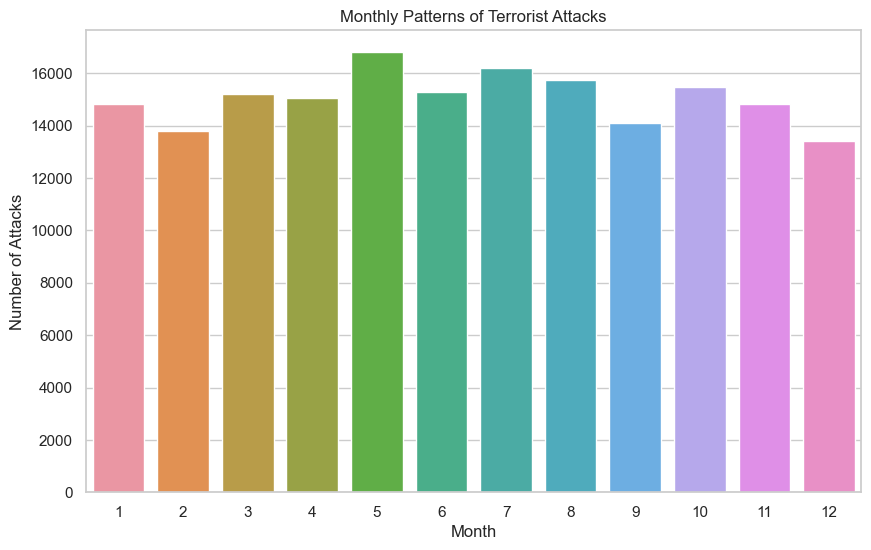

In [136]:
# Seasonality - Monthly
monthly_attacks = data_filter.groupby(data_filter['Date'].dt.month)['Country'].count()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_attacks.index, y=monthly_attacks.values)
plt.title('Monthly Patterns of Terrorist Attacks')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.show()


 Month of "May" and "July" are the one with most terrorist activities. Therefore, Security must be strengthened in these months

**Attack Types - Yearly**

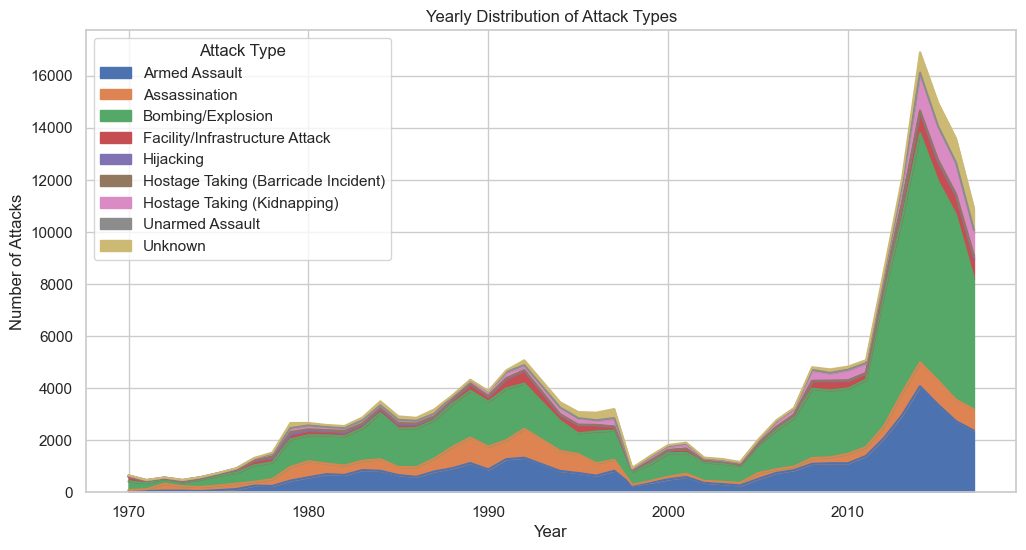

In [139]:
# # Attack Types - Yearly
attack_type_counts = df.groupby(['Year', 'AttackType'])['Country'].count().unstack()
attack_type_counts.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title('Yearly Distribution of Attack Types')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type')
plt.show()

**Casualties Analysis**

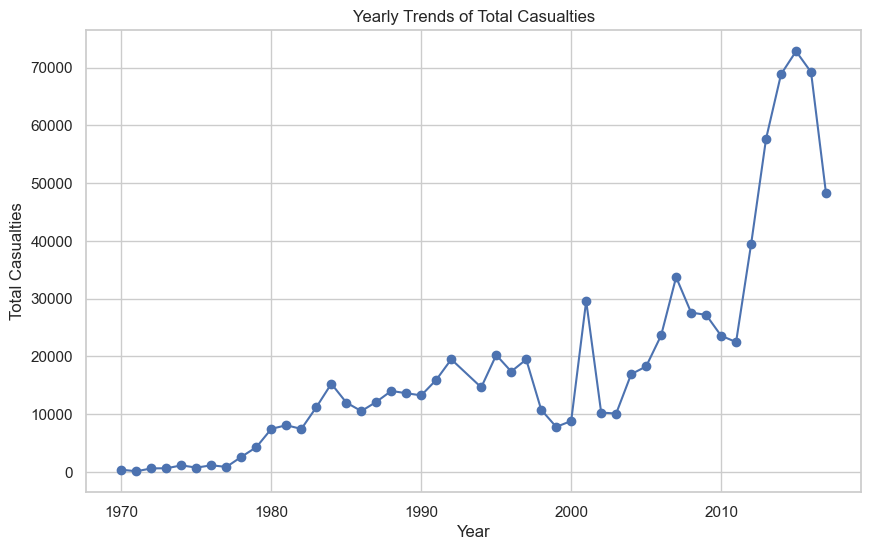

In [140]:
data_filter['Total_Casualties'] = data_filter['Killed'] + data_filter['Wounded']
casualties_over_time = data_filter.groupby(data_filter['Date'].dt.year)['Total_Casualties'].sum()
plt.figure(figsize=(10, 6))
plt.plot(casualties_over_time.index, casualties_over_time.values, marker='o')
plt.title('Yearly Trends of Total Casualties')
plt.xlabel('Year')
plt.ylabel('Total Casualties')
plt.grid(True)
plt.show()

**Attacks target over time**

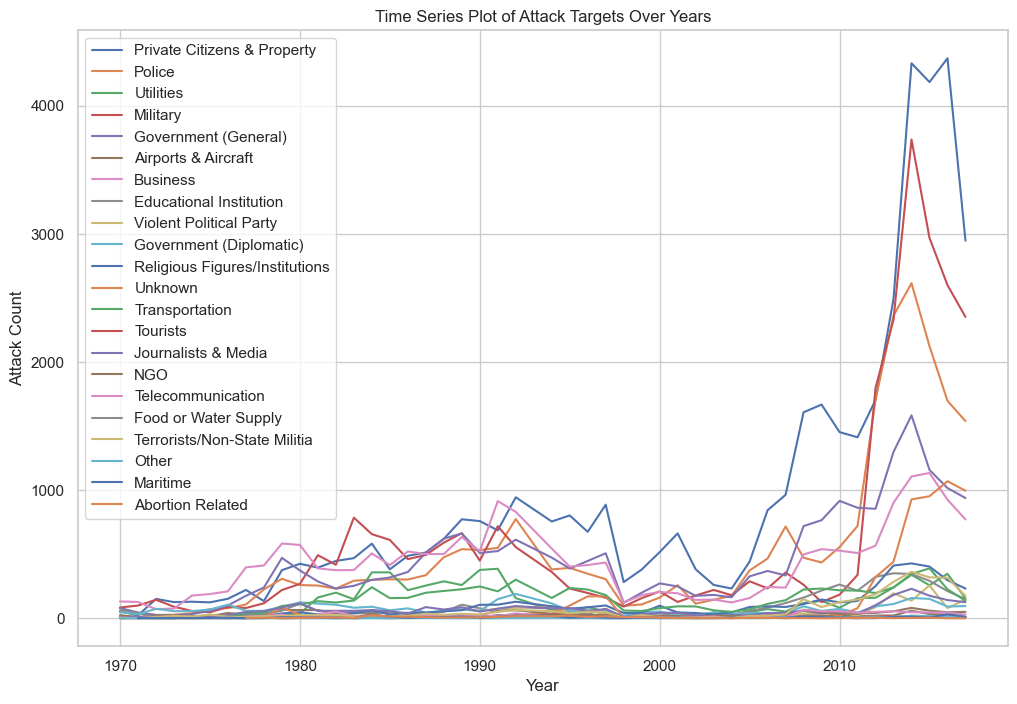

In [141]:
grouped = data_filter.groupby(['Year', 'Target_type']).size().reset_index(name='AttackCount')

plt.figure(figsize=(12, 8))

for target in data_filter['Target_type'].unique():
    target_data = grouped[grouped['Target_type'] == target]
    plt.plot(target_data['Year'], target_data['AttackCount'], label=target)
plt.title('Time Series Plot of Attack Targets Over Years')
plt.xlabel('Year')
plt.ylabel('Attack Count')
plt.legend()
plt.grid(True)
plt.show()
plt.show()

**Timely incidents in countries most affected by terrorism**

In [143]:
most_affected_country = top_countries['Country']
groupby_most_affected = data_filter.groupby(['Year','Country']).size().reset_index(name ='Incidents')


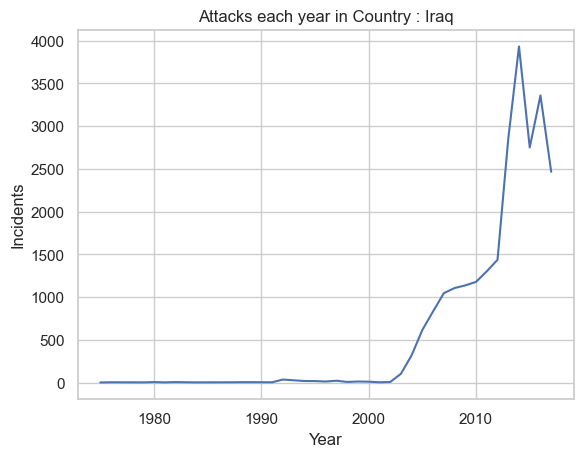

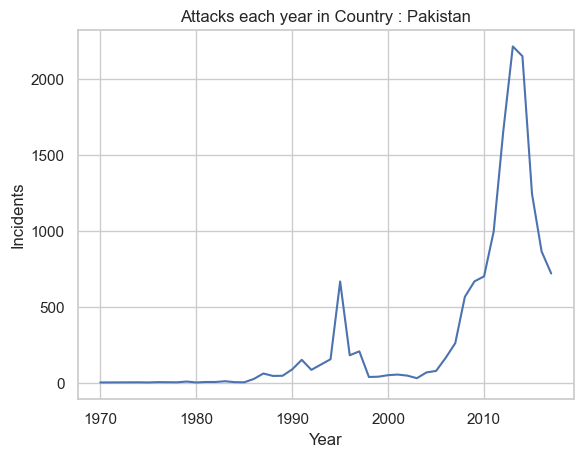

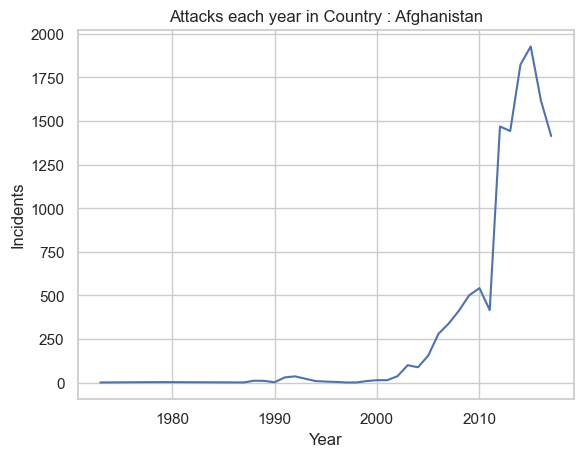

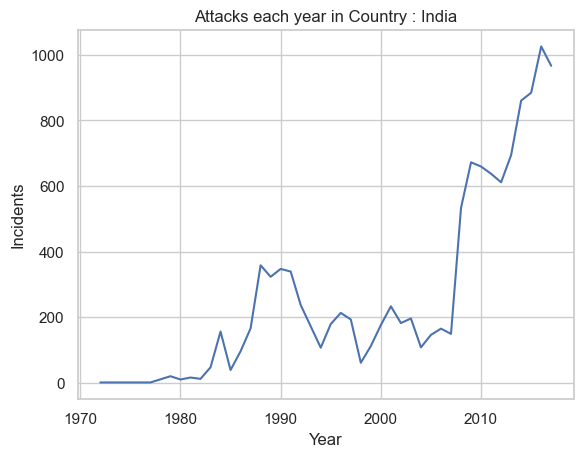

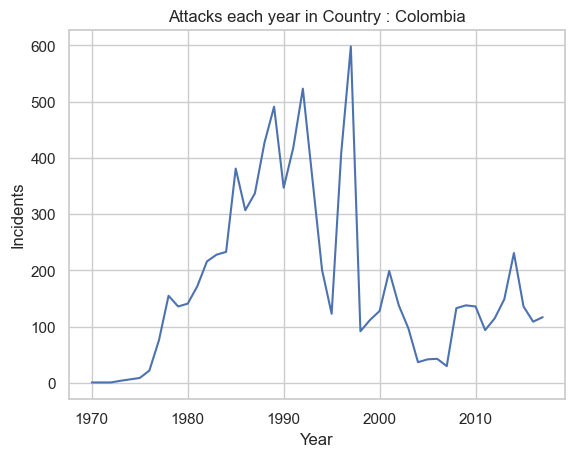

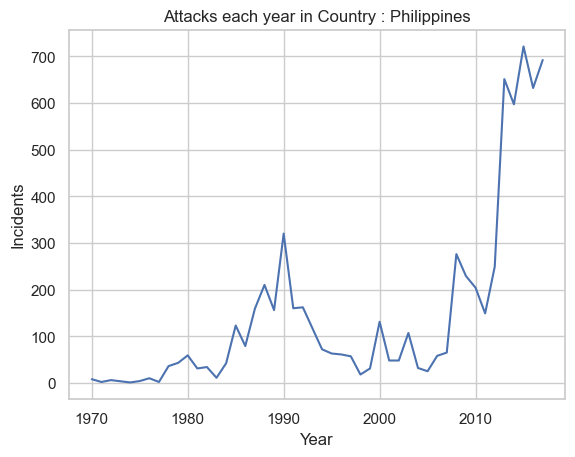

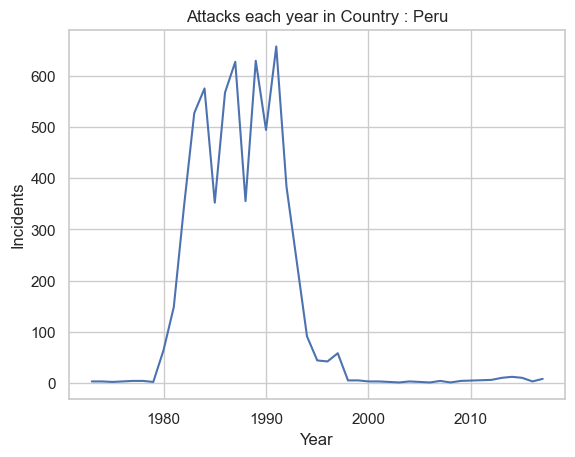

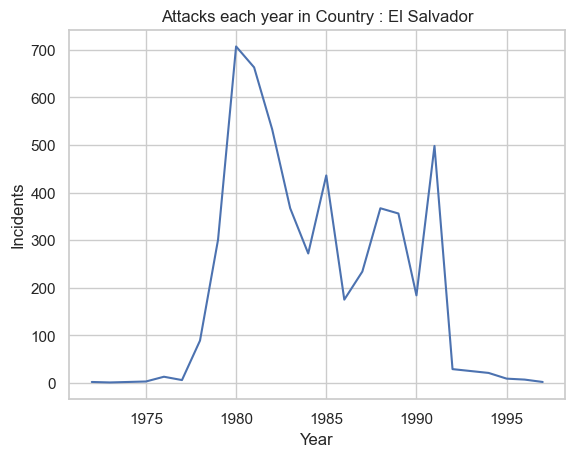

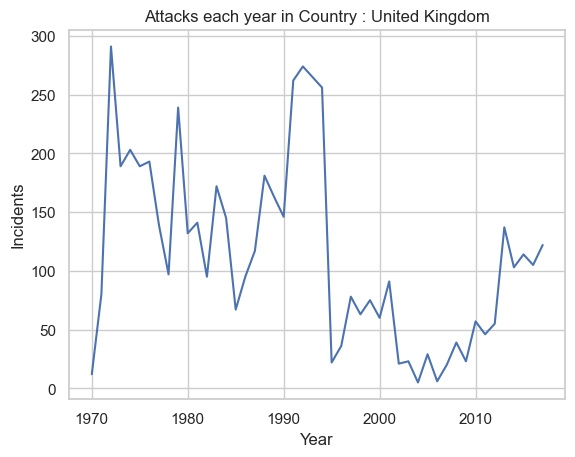

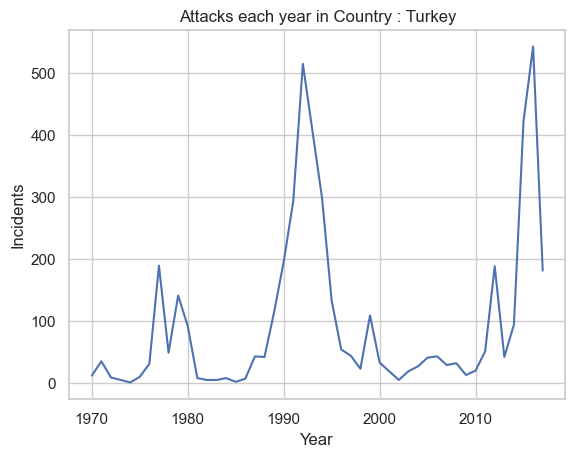

In [144]:
for i in most_affected_country:
    affected_data = groupby_most_affected[groupby_most_affected['Country'] == i]
    plt.plot(affected_data['Year'],affected_data['Incidents'])
    plt.title(f'Attacks each year in Country : {i}')
    plt.xlabel('Year')
    plt.ylabel('Incidents')
    plt.show()


**6.Support and confidence**

In [145]:
# Function to calculate support and confidence
def calculate_support(df,itemset):
    total_trans = len(df)
    support_count = df[df.apply(lambda transaction: all(item in transaction.values for item in itemset),axis=1)].shape[0]
    support = support_count/total_trans
    return support

def calculate_confidence(df,itemset1,itemset2):
    support1 = calculate_support(df,itemset1)
    support12 = calculate_support(df,itemset1+itemset2)
    confidence = support12/support1 if support1 != 0 else 0
    return confidence

In [147]:
# data to be used
df1 = df[['AttackType','Group','Weapon_type','Target_type']]

#lets see data in which we check support and confidence
df1.head()

AttackType                               Group  \
0                   Assassination                              MANO-D   
1     Hostage Taking (Kidnapping)  23rd of September Communist League   
2                   Assassination                             Unknown   
3               Bombing/Explosion                             Unknown   
4  Facility/Infrastructure Attack                             Unknown   

  Weapon_type                  Target_type  
0     Unknown  Private Citizens & Property  
1     Unknown      Government (Diplomatic)  
2     Unknown          Journalists & Media  
3  Explosives      Government (Diplomatic)  
4  Incendiary      Government (Diplomatic)

**Lets check support for { AttackType : Armed Assault , Group : Taliban, 'Target_type':'Police'}
and Confidence for { Weapon_type : Incendiary}**

In [149]:
itemset1 =['Armed Assault','Taliban','Police']
itemset2 = ['Incendiary']

In [151]:
support1 = calculate_support(df, itemset1) *100
print(f"Support for itemset :\n {','.join(itemset1)}: {support1:.2f}%")


Support for itemset :
 Armed Assault,Taliban,Police: 0.57%


In [153]:
confidence = calculate_confidence(df, itemset1, itemset2) *100
print(f"Confidence for rule : \n {','.join(itemset1)} => {','.join(itemset2)}: {confidence:.2f}")


Confidence for rule : 
 Armed Assault,Taliban,Police => Incendiary: 0.29


**7. Visualizing the words**

In [179]:

from wordcloud import wordcloud

# Droping the columns with nil value in target

data1 = df[~df['Target'].isna()]

# Concatenating the target, motive, and summary columns
text = data1['Target'].astype(str) + ' ' + data1['Motive'].astype(str) + ' ' + data1['Summary'].astype(str)
text = ' '.join(text)

# Generate the word cloud
wordcloud = wordcloud(width=800, height=400, max_font_size=150, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Targets, Motives, and Summaries')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

**8. Report**

**1.Introduction**

*What is Terrorism*

 Terrorism is defined in the Oxford Dictionary as “the unlawful use of violence and intimidation,
 especially against civilians, in the pursuit of political aims.”


Terrorism can also be defined as the method of using voilence in various ways to create fear and create a chaotic enviornment within population in order to achieve their various aims like occupying land, changing relegious activities or against any relgion, overthrowing goverment with method of violence or any of their ideological objectives. Terrorist act can involve bombings, shootings, hostage taking or any other way of creating violence aginst civilians. The motivations behind terrorism can vary widely, ranging from separatism and nationalism to religious extremism and ideological zeal. Governments, organizations, and international bodies work to counter and prevent terrorism through various means, including intelligence gathering, law enforcement, diplomacy, and addressing root causes such as socio-economic disparities and political grievances.


**About Dataset**

The Dataset was extracted from the Global Terrorism Database (GTD) - an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

The GTD was designed to gather a wide variety of etiological and situational variables pertaining to each terrorist incident. Depending on availability of information, the database records up to 120 separate attributes of each incident, including approximately 75 coded variables that can be used for statistical analysis.

It consists of various columns some of them are:

incident date
region
country
state/province
city
latitude and longitude
group name
tactic used in attack
nature of the target
target identity
type of weapons used
whether the incident was considered a success
target type
summary of attack
total number of fatalities
total number of injured
motive of attack
Other variables provide information unique to specific types of cases, including kidnappings, hostage incidents, and hijackings

**2. Previous related works**

*1. Use in other databases and indices*


Data from the Global Terrorism Database is used to generate the Global Terrorism Index (GTI) published by the Institute for Economics and Peace.

*2. Academic reception*

A number of academic papers are written used by studying various aspects of terrorism with the help of this data, which includes the trends and various insights about the types of terrorism or types of method used to execute terrorism activities and thus creating meaningful analysis.

In the book The Better Angels of Our Nature, author Steven Pinker used data from the Global Terrorism Database for his analysis of trends in terrorism, calling it "the major publicly available dataset on terrorist attacks."

In 2014, Pape et al. observed that, "according to the GTD data today, there were over 70 percent more suicide attacks in 2013 (619) than the previous peak in 2007 (359) during the Iraq war." Meanwhile, their Chicago Project on Security and Terrorism (CPOST) claims a 19 percent decrease for the same period.

These were several studies done using GTD Database.

*Reception in news media and blogs*

The Global Terrorism Database has been cited in The Guardian, using a database of terrorism we look at how the frequency and type of attack has changed the New York Times,the Washington Post,the Wall Street Journal, and Foreign Policy.

**3. Methodology**

*EDA (Exploratory Data Analysis)*

Exploratory data analysis (EDA) is an approach that is used to analyze the data and discover trends, patterns, or check assumptions in data with the help of statistical summaries and graphical representations.It is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

*Few steps of EDA are:*

Understand the Dataset: Start by gaining a high-level understanding of the dataset. Look at the dataset's structure, the number of rows and columns, and the data types of each column. This step helps you get familiar with the data you'll be working with.

Handling Missing Data and Removing Duplicates: Identify missing values in the dataset and decide how to handle them. Depending on the amount and nature of missing data, you can choose to drop rows or columns with missing values, impute missing values with suitable methods, or keep missing values as a separate category if applicable. Check for duplicate records in the dataset. If duplicates exist, decide whether to remove them or handle them based on the specific analysis requirements.

Examine Descriptive Statistics: Calculate descriptive statistics for numerical variables such as mean, median, standard deviation, minimum, and maximum values. This step provides a summary of the central tendency and spread of the data.

Visualize the Data: Use various plots and charts to visualize the data and identify patterns, trends, or outliers. Some commonly used visualizations include histograms, scatter plots, bar charts, box plots, and correlation matrices.

**4. Analysis and Implementation**

Exploratory data implementation

**1.Collect and Load Data:** Collecting the dataset from kaggle website i.e. Global Terrorism Database.
Loading the dataset using python library Pandas in Jupyter notebook.

**2. Understand the Data:** Getting a basic understanding of the GTD data by inspecting the first few rows (df.head()), checking data types (df.info()), and getting summary statistics (df.describe()).

**3. Handle Missing Values:** Identify and handle missing data. Used df.isna().sum() to count missing values in each column.
Created a function to create a table of missing values with percentage of missing values in it.
Depending on the amount of missing data, I choosed to drop columns with more than 40 percent of missing data , and for other analysis I choosed to drop rows and fill missing values, or keep them as a separate category.

**4. Explore Data Distribution:** Visualized the distribution of numeric features using histograms (df.hist()). For categorical features, use bar plots (df['feature'].value_counts().plot(kind='bar')) to see the distribution.
For time series data plotted line plot to see the distribution over a time period i.e. plt.plot()

**5.Analyze Correlations:** Calculate and visualize correlations between numeric features using a correlation matrix (df.corr()). This helped in identifying relationships between variables which seen to be very high.

**6. Visualize Relationships:** Visualization done using Python libraries like Plotly, matplotlib, seaborn, wordcloud.
Explored relationships between features using bar plots (plt.bar()), created pie plots(plt.pie) for finding caategorical distribution for each class.

**7. Feature Engineering:** Added new column casualties to the table by merging two columns killed and wounded.
Created date column with right day,month and year in it.

**8.Categorical Insights:** Created various categorical bar plot and pie plot.
Visualized the data and found insights from it.



**9.Time Series Analysis (if applicable):** Analyzed the time series data ,analyzed trend, seasonality using line plots and gathered insights from it.

**10.Finalize Insights:** Summarize the key insights in points. Identify patterns, trends, potential correlations, and wrote notable findings below them.

**5.Findings**

As Year passing by these 4 terrorist groups becoming stronger and resulting to major events around the globe

**A.ISIL ( Islamic State of Iraq and the levant )** ISIL was the deadliest group in 2016 with a more than 100 percent increase in deaths from its previous peak in 2015. This group is active in Iraq however after attacks in 2016 it has lower its activites and on further finding s we find out, ISIL is now near complete military defeat in Iraq and Syria. Thus we can see less events from this group for a year two as it was near complete defeat. ISIL main method of attack is Explosion and Bombing. Their most attacked target are 'Private citizen and Property , Military'.

**B.Taliban**As plotted above the activities of Taliban over years ,their terrorist attack trend keep growing and if it this keeps on they will lead to some major events in coming years as we can see in present day, Taliban overthrowned the Afghanistan goverment and now it is in power in the country. Taliban consistently used bombings and armed assaults as its main modes of attack. Seems their favourite target is 'Police and Military'.

**C.Al-Shabaab** A Salafist militant group active in East Africa. This group recorded a more than 4 times casuslties in 2017 compared to what it was in 2016. This exponential growth suggest only that this group is strengthening i region of somalia and kenya. Al-Shabaab has consistently utilised bombings and armed assaults as its main modes of attack. Seems their favourite target is 'Military'.

**D.Boko Haram** Boko Haram is a jihadist extremist group based in northeastern Nigeria. This group engaging in terrorism activities from 2010 therfore it can be called as emerging terrorist group which did a major attack in 2014 as seen graph resulting in more than 300 casualties. There major source of attack is Armed Assault, and seems to target 'Private citizen and Property' more often.

2.Iraq experienced a 40 per cent increase in deaths in 2016 in reflecting the increased intensity of ISIL activity following attacks by the Iraqi Armed Forces.

3.Middle East & North Africa , South East Asia are the two regions that seen a major surge of terrorism activities from 2005 till 2015 , while Central and South America were least affected.

4.It seems that month of "May" and "July" are the one with most terrorist activities. Therefore, Security must be strengthened in these months.

5.From above analysis their are many groups that are in their ending phase since 1970 because of internal splintering or due to defeat from military or police like IRA(Irish Republic Army) , FMLN

6.Four of the countries with the highest impact from terrorism recorded a reduction in the number of deaths; Afghanistan, India, Syria and Pakistan.

**6. Conclusion**

Their is  a global decline in the number of deaths from terrorist attacks in 2017 comparable to from the peak in 2014. Terrorism has in downfall stage in the Syria, Pakistan, Afghanistan and India, which are four of the five countries most affected by terrorism as of 2017.